# Importing the Required Libraries

In [356]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from sklearn.linear_model import LinearRegression
from  sklearn.svm import SVR
from statsmodels.tsa.api import Holt
#Disable Warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error


# 1. Exploratory Data Analysis

In [357]:
clinical_data = pd.read_csv('clinical_data.csv')

In [358]:
clinical_data.head()

,season,date_code,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
0,2009-2010,200940,10/10/2009,Bay Area,Influenza_A,36,220,16.36
1,2009-2010,200940,10/10/2009,Bay Area,Influenza_B,0,220,0.00
2,2009-2010,200940,10/10/2009,Bay Area,Total_Influenza,36,220,16.36
3,2009-2010,200940,10/10/2009,Bay Area,RSV,0,190,0.00
4,2009-2010,200940,10/10/2009,California,Influenza_A,1077,3324,32.40


In [359]:
clinical_data.tail()

,season,date_code,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
50006,2019-2020,202039,9/26/2020,Upper/Lower Southern,Parainfluenza_2,0,0,NaN
50007,2019-2020,202039,9/26/2020,Upper/Lower Southern,Parainfluenza_3,0,0,NaN
50008,2019-2020,202039,9/26/2020,Upper/Lower Southern,Parainfluenza_4,0,0,NaN
50009,2019-2020,202039,9/26/2020,Upper/Lower Southern,Parainfluenza_UnknownType,0,0,NaN
50010,2019-2020,202039,9/26/2020,Upper/Lower Southern,Total_Parainfluenza,0,0,NaN


In [360]:
clinical_data.shape

(50011, 8)

In [361]:
# Step 2: Check for missing values
missing_values = clinical_data.isnull().sum()
print(missing_values)

season                  0
date_code               0
weekending              0
region                  0
respiratory_virus       0
number_positive         0
specimens_tested        0
percent_positive     7597
dtype: int64


In [362]:
# extract rows where 'percent_positive' is null and show only 'specimens_tested', 'number_positive', and 'percent_positive' columns
null_percent_positive = clinical_data.loc[clinical_data['percent_positive'].isnull(), ['specimens_tested', 'number_positive', 'percent_positive']]

print(null_percent_positive)

       specimens_tested  number_positive  percent_positive
16                    0                0               NaN
17                    0                0               NaN
18                    0                0               NaN
19                    0                0               NaN
48                    0                0               NaN
...                 ...              ...               ...
50006                 0                0               NaN
50007                 0                0               NaN
50008                 0                0               NaN
50009                 0                0               NaN
50010                 0                0               NaN

[7597 rows x 3 columns]


In [363]:
clinical_data_copy_missing_correction=clinical_data.copy()

In [364]:
clinical_data_copy_missing_correction.shape

(50011, 8)

In [365]:
# calculate percent_positive and insert zero if specimens_tested and number_positive are zero
clinical_data_copy_missing_correction['percent_positive'] = clinical_data_copy_missing_correction['number_positive'] / clinical_data_copy_missing_correction['specimens_tested'] * 100
clinical_data_copy_missing_correction.loc[(clinical_data_copy_missing_correction['specimens_tested'] == 0) & (clinical_data_copy_missing_correction['number_positive'] == 0), 'percent_positive'] = 0

print(clinical_data_copy_missing_correction)

          season  date_code  weekending                region  \
0      2009-2010     200940  10/10/2009              Bay Area   
1      2009-2010     200940  10/10/2009              Bay Area   
2      2009-2010     200940  10/10/2009              Bay Area   
3      2009-2010     200940  10/10/2009              Bay Area   
4      2009-2010     200940  10/10/2009            California   
...          ...        ...         ...                   ...   
50006  2019-2020     202039   9/26/2020  Upper/Lower Southern   
50007  2019-2020     202039   9/26/2020  Upper/Lower Southern   
50008  2019-2020     202039   9/26/2020  Upper/Lower Southern   
50009  2019-2020     202039   9/26/2020  Upper/Lower Southern   
50010  2019-2020     202039   9/26/2020  Upper/Lower Southern   

               respiratory_virus  number_positive  specimens_tested  \
0                    Influenza_A               36               220   
1                    Influenza_B                0               220   
2     

In [366]:
# Step 2: Check for missing values
missing_values = clinical_data_copy_missing_correction.isnull().sum()
print(missing_values)

season               0
date_code            0
weekending           0
region               0
respiratory_virus    0
number_positive      0
specimens_tested     0
percent_positive     0
dtype: int64


In [367]:
clinical_data_copy_missing_correction['date_code'] = clinical_data_copy_missing_correction['date_code'].astype(str)
clinical_data_copy_missing_correction['weekending']=pd.to_datetime(clinical_data_copy_missing_correction['weekending'])

In [368]:
clinical_data_copy_missing_correction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50011 entries, 0 to 50010
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   season             50011 non-null  object        
 1   date_code          50011 non-null  object        
 2   weekending         50011 non-null  datetime64[ns]
 3   region             50011 non-null  object        
 4   respiratory_virus  50011 non-null  object        
 5   number_positive    50011 non-null  int64         
 6   specimens_tested   50011 non-null  int64         
 7   percent_positive   50011 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 3.1+ MB


In [369]:
clinical_data_copy_missing_correction.shape

(50011, 8)

In [370]:
# Step 2: Check for missing values
missing_values = clinical_data_copy_missing_correction.isnull().sum()
print(missing_values)

season               0
date_code            0
weekending           0
region               0
respiratory_virus    0
number_positive      0
specimens_tested     0
percent_positive     0
dtype: int64


In [371]:
surveillance_clinical_data=pd.read_csv('surveillance_clinical_data.csv')

In [372]:
surveillance_clinical_data.head()

,season,date_code,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
0,2009-2010,200940,10/10/2009,Bay Area,Influenza_A,36,220,16.36
1,2009-2010,200940,10/10/2009,Bay Area,Influenza_B,0,220,0.00
2,2009-2010,200940,10/10/2009,Bay Area,Total_Influenza,36,220,16.36
3,2009-2010,200940,10/10/2009,Bay Area,RSV,0,190,0.00
4,2009-2010,200940,10/10/2009,California,Influenza_A,1077,3324,32.40


In [373]:
surveillance_clinical_data.tail()

,season,date_code,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
36174,2017-2018,201839,9/29/2018,Upper/Lower Southern,Parainfluenza_2,14,521,2.69
36175,2017-2018,201839,9/29/2018,Upper/Lower Southern,Parainfluenza_3,6,521,1.15
36176,2017-2018,201839,9/29/2018,Upper/Lower Southern,Parainfluenza_4,5,521,0.96
36177,2017-2018,201839,9/29/2018,Upper/Lower Southern,Parainfluenza_UnknownType,0,521,0.00
36178,2017-2018,201839,9/29/2018,Upper/Lower Southern,Total_Parainfluenza,25,521,4.80


In [374]:
surveillance_clinical_data.shape

(36179, 8)

In [375]:
surveillance_clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36179 entries, 0 to 36178
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             36179 non-null  object 
 1   date_code          36179 non-null  int64  
 2   weekending         36179 non-null  object 
 3   region             36179 non-null  object 
 4   respiratory_virus  36179 non-null  object 
 5   number_positive    36179 non-null  int64  
 6   specimens_tested   36179 non-null  int64  
 7   percent_positive   30345 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.2+ MB


In [376]:
# Step 2: Check for missing values
missing_values = surveillance_clinical_data.isnull().sum()
print(missing_values)

season                  0
date_code               0
weekending              0
region                  0
respiratory_virus       0
number_positive         0
specimens_tested        0
percent_positive     5834
dtype: int64


In [377]:
# extract rows where 'percent_positive' is null and show only 'specimens_tested', 'number_positive', and 'percent_positive' columns
null_percent_positive = surveillance_clinical_data.loc[surveillance_clinical_data['percent_positive'].isnull(), ['specimens_tested', 'number_positive', 'percent_positive']]

print(null_percent_positive)

       specimens_tested  number_positive  percent_positive
16                    0                0               NaN
17                    0                0               NaN
18                    0                0               NaN
19                    0                0               NaN
48                    0                0               NaN
...                 ...              ...               ...
36128                 0                0               NaN
36129                 0                0               NaN
36130                 0                0               NaN
36131                 0                0               NaN
36132                 0                0               NaN

[5834 rows x 3 columns]


In [378]:
surveillance_clinical_data_copy_missing_correction=surveillance_clinical_data.copy()

In [379]:
surveillance_clinical_data.shape

(36179, 8)

In [380]:
# calculate percent_positive and insert zero if specimens_tested and number_positive are zero
surveillance_clinical_data_copy_missing_correction['percent_positive'] = surveillance_clinical_data_copy_missing_correction['number_positive'] / surveillance_clinical_data_copy_missing_correction['specimens_tested'] * 100
surveillance_clinical_data_copy_missing_correction.loc[(surveillance_clinical_data_copy_missing_correction['specimens_tested'] == 0) & (surveillance_clinical_data_copy_missing_correction['number_positive'] == 0), 'percent_positive'] = 0

print(surveillance_clinical_data_copy_missing_correction)

          season  date_code  weekending                region  \
0      2009-2010     200940  10/10/2009              Bay Area   
1      2009-2010     200940  10/10/2009              Bay Area   
2      2009-2010     200940  10/10/2009              Bay Area   
3      2009-2010     200940  10/10/2009              Bay Area   
4      2009-2010     200940  10/10/2009            California   
...          ...        ...         ...                   ...   
36174  2017-2018     201839   9/29/2018  Upper/Lower Southern   
36175  2017-2018     201839   9/29/2018  Upper/Lower Southern   
36176  2017-2018     201839   9/29/2018  Upper/Lower Southern   
36177  2017-2018     201839   9/29/2018  Upper/Lower Southern   
36178  2017-2018     201839   9/29/2018  Upper/Lower Southern   

               respiratory_virus  number_positive  specimens_tested  \
0                    Influenza_A               36               220   
1                    Influenza_B                0               220   
2     

In [381]:
# Step 2: Check for missing values
missing_values = surveillance_clinical_data_copy_missing_correction.isnull().sum()
print(missing_values)

season               0
date_code            0
weekending           0
region               0
respiratory_virus    0
number_positive      0
specimens_tested     0
percent_positive     0
dtype: int64


In [382]:
surveillance_clinical_data_copy_missing_correction['date_code'] = surveillance_clinical_data_copy_missing_correction['date_code'].astype(str)
surveillance_clinical_data_copy_missing_correction['weekending']=pd.to_datetime(surveillance_clinical_data_copy_missing_correction['weekending'])

In [383]:
surveillance_clinical_data_copy_missing_correction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36179 entries, 0 to 36178
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   season             36179 non-null  object        
 1   date_code          36179 non-null  object        
 2   weekending         36179 non-null  datetime64[ns]
 3   region             36179 non-null  object        
 4   respiratory_virus  36179 non-null  object        
 5   number_positive    36179 non-null  int64         
 6   specimens_tested   36179 non-null  int64         
 7   percent_positive   36179 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 2.2+ MB


In [384]:
surveillance_clinical_data_copy_missing_correction.shape

(36179, 8)

In [385]:
# Step 2: Check for missing values
missing_values = surveillance_clinical_data_copy_missing_correction.isnull().sum()
print(missing_values)

season               0
date_code            0
weekending           0
region               0
respiratory_virus    0
number_positive      0
specimens_tested     0
percent_positive     0
dtype: int64


In [386]:
if clinical_data_copy_missing_correction.columns.equals(surveillance_clinical_data_copy_missing_correction.columns):
    print("The columns of the two dataframes are equal")
else:
    print("The columns of the two dataframes are not equal")

The columns of the two dataframes are equal


In [387]:
clinical_combined=pd.concat([clinical_data_copy_missing_correction,surveillance_clinical_data_copy_missing_correction])

In [388]:
clinical_combined.tail()

,season,date_code,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
36174,2017-2018,201839,2018-09-29,Upper/Lower Southern,Parainfluenza_2,14,521,2.687140
36175,2017-2018,201839,2018-09-29,Upper/Lower Southern,Parainfluenza_3,6,521,1.151631
36176,2017-2018,201839,2018-09-29,Upper/Lower Southern,Parainfluenza_4,5,521,0.959693
36177,2017-2018,201839,2018-09-29,Upper/Lower Southern,Parainfluenza_UnknownType,0,521,0.000000
36178,2017-2018,201839,2018-09-29,Upper/Lower Southern,Total_Parainfluenza,25,521,4.798464


In [389]:
clinical_combined=clinical_combined.reset_index(drop=True)

In [390]:
clinical_combined.tail()

,season,date_code,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
86185,2017-2018,201839,2018-09-29,Upper/Lower Southern,Parainfluenza_2,14,521,2.687140
86186,2017-2018,201839,2018-09-29,Upper/Lower Southern,Parainfluenza_3,6,521,1.151631
86187,2017-2018,201839,2018-09-29,Upper/Lower Southern,Parainfluenza_4,5,521,0.959693
86188,2017-2018,201839,2018-09-29,Upper/Lower Southern,Parainfluenza_UnknownType,0,521,0.000000
86189,2017-2018,201839,2018-09-29,Upper/Lower Southern,Total_Parainfluenza,25,521,4.798464


In [391]:
# drop duplicate rows
clinical_combined.drop_duplicates(inplace=True)

In [392]:
clinical_combined.shape

(54029, 8)

In [393]:
clinical_combined.head()

,season,date_code,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
0,2009-2010,200940,2009-10-10,Bay Area,Influenza_A,36,220,16.363636
1,2009-2010,200940,2009-10-10,Bay Area,Influenza_B,0,220,0.000000
2,2009-2010,200940,2009-10-10,Bay Area,Total_Influenza,36,220,16.363636
3,2009-2010,200940,2009-10-10,Bay Area,RSV,0,190,0.000000
4,2009-2010,200940,2009-10-10,California,Influenza_A,1077,3324,32.400722


In [394]:
clinical_combined.tail()

,season,date_code,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
86092,2017-2018,201839,2018-09-29,California,Parainfluenza_4,10,1275,0.784314
86093,2017-2018,201839,2018-09-29,California,Parainfluenza_UnknownType,0,1275,0.000000
86094,2017-2018,201839,2018-09-29,California,Total_Parainfluenza,58,1275,4.549020
86104,2017-2018,201839,2018-09-29,Central,Coronavirus_UnknownType,0,45,0.000000
86105,2017-2018,201839,2018-09-29,Central,Total_Coronavirus,0,45,0.000000


In [395]:
clinical_combined=clinical_combined.reset_index(drop=True)

In [396]:
clinical_combined.head()

,season,date_code,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
0,2009-2010,200940,2009-10-10,Bay Area,Influenza_A,36,220,16.363636
1,2009-2010,200940,2009-10-10,Bay Area,Influenza_B,0,220,0.000000
2,2009-2010,200940,2009-10-10,Bay Area,Total_Influenza,36,220,16.363636
3,2009-2010,200940,2009-10-10,Bay Area,RSV,0,190,0.000000
4,2009-2010,200940,2009-10-10,California,Influenza_A,1077,3324,32.400722


In [397]:
clinical_combined.tail()

,season,date_code,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
54024,2017-2018,201839,2018-09-29,California,Parainfluenza_4,10,1275,0.784314
54025,2017-2018,201839,2018-09-29,California,Parainfluenza_UnknownType,0,1275,0.000000
54026,2017-2018,201839,2018-09-29,California,Total_Parainfluenza,58,1275,4.549020
54027,2017-2018,201839,2018-09-29,Central,Coronavirus_UnknownType,0,45,0.000000
54028,2017-2018,201839,2018-09-29,Central,Total_Coronavirus,0,45,0.000000


In [398]:
# check if the rows in the 'clinical_combined' DataFrame are unique
is_unique = clinical_combined.duplicated(keep=False)

# print the duplicated rows
print(clinical_combined[is_unique])

Empty DataFrame
Columns: [season, date_code, weekending, region, respiratory_virus, number_positive, specimens_tested, percent_positive]
Index: []


In [399]:
# checking unique values for region column in clinical_combined dataframe
unique_values = clinical_combined['region'].unique()
print(unique_values)

clinical_combined.head()

['Bay Area' 'California' 'Central' 'Lower Southern' 'Northern'
 'Northern/Bay Area' 'Upper Southern' 'Upper/Lower Southern']


,season,date_code,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
0,2009-2010,200940,2009-10-10,Bay Area,Influenza_A,36,220,16.363636
1,2009-2010,200940,2009-10-10,Bay Area,Influenza_B,0,220,0.000000
2,2009-2010,200940,2009-10-10,Bay Area,Total_Influenza,36,220,16.363636
3,2009-2010,200940,2009-10-10,Bay Area,RSV,0,190,0.000000
4,2009-2010,200940,2009-10-10,California,Influenza_A,1077,3324,32.400722


In [400]:
unique_values = clinical_combined['respiratory_virus'].unique()
print(unique_values)


['Influenza_A' 'Influenza_B' 'Total_Influenza' 'RSV' 'Adenovirus'
 'Enterovirus_Rhinovirus' 'HMPV' 'Parainfluenza_1' 'Parainfluenza_2'
 'Parainfluenza_3' 'Parainfluenza_4' 'Parainfluenza_UnknownType'
 'Total_Parainfluenza' 'Coronavirus_HKU1' 'Coronavirus_NL63'
 'Coronavirus_OC43' 'Coronavirus_229E' 'Coronavirus_UnknownType'
 'Total_Coronavirus']


In [401]:
# create a list of values to filter out Total_Influenza,Total_Parainfluenza and Total_Coronavirus from clinical_combined dataframe.
filter_list = ['Total_Influenza', 'Total_Parainfluenza', 'Total_Coronavirus']
# filter out the rows containing these values
clinical_combined_filtered = clinical_combined[~clinical_combined['respiratory_virus'].isin(filter_list)]
clinical_combined_total_repiratory_virus = clinical_combined[clinical_combined['respiratory_virus'].isin(filter_list)]

In [402]:
clinical_combined_filtered=clinical_combined_filtered.reset_index(drop=True)

In [403]:
clinical_combined_total_repiratory_virus=clinical_combined_total_repiratory_virus.reset_index(drop=True)

In [404]:
clinical_combined_total_repiratory_virus.shape

(9031, 8)

In [405]:
clinical_combined_total_repiratory_virus.head()

,season,date_code,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
0,2009-2010,200940,2009-10-10,Bay Area,Total_Influenza,36,220,16.363636
1,2009-2010,200940,2009-10-10,California,Total_Influenza,1080,3324,32.490975
2,2009-2010,200940,2009-10-10,Central,Total_Influenza,203,787,25.794155
3,2009-2010,200940,2009-10-10,Lower Southern,Total_Influenza,21,150,14.000000
4,2009-2010,200940,2009-10-10,Northern,Total_Influenza,0,0,0.000000


In [406]:
clinical_combined_total_repiratory_virus.tail()

,season,date_code,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
9026,2017-2018,201839,2018-09-29,Bay Area,Total_Parainfluenza,14,313,4.472843
9027,2017-2018,201839,2018-09-29,California,Total_Influenza,12,1441,0.832755
9028,2017-2018,201839,2018-09-29,California,Total_Coronavirus,6,746,0.804290
9029,2017-2018,201839,2018-09-29,California,Total_Parainfluenza,58,1275,4.549020
9030,2017-2018,201839,2018-09-29,Central,Total_Coronavirus,0,45,0.000000


In [407]:
clinical_combined_filtered.head()

,season,date_code,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
0,2009-2010,200940,2009-10-10,Bay Area,Influenza_A,36,220,16.363636
1,2009-2010,200940,2009-10-10,Bay Area,Influenza_B,0,220,0.000000
2,2009-2010,200940,2009-10-10,Bay Area,RSV,0,190,0.000000
3,2009-2010,200940,2009-10-10,California,Influenza_A,1077,3324,32.400722
4,2009-2010,200940,2009-10-10,California,Influenza_B,3,3324,0.090253


In [408]:
clinical_combined_filtered.shape

(44998, 8)

In [409]:
clinical_combined_filtered_group_by_week = clinical_combined_filtered.drop(["season", "date_code"], axis=1).groupby("weekending").agg({
    "region":pd.Series.nunique, 
    "respiratory_virus":pd.Series.nunique, 
    "number_positive": "sum", 
    "specimens_tested": "sum", 
    "percent_positive": "mean"
}).reset_index()

In [410]:
clinical_combined_filtered_group_by_week.head()

,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
0,2009-10-10,8,3,2164,17732,7.345434
1,2009-10-17,8,3,2940,20300,9.482325
2,2009-10-24,8,3,2804,19798,8.309292
3,2009-10-31,8,3,1988,16222,7.813403
4,2009-11-07,8,3,1638,14562,7.903365


In [411]:
clinical_combined_filtered_group_by_week=clinical_combined_filtered_group_by_week.reset_index(drop=True)

In [412]:
# drop duplicate rows
clinical_combined_filtered_group_by_week.drop_duplicates(inplace=True)

In [413]:
clinical_combined_filtered_group_by_week=clinical_combined_filtered_group_by_week.reset_index(drop=True)

In [414]:
clinical_combined_filtered_group_by_week.to_csv('clinical_combined_filtered_group_by_week.csv',index=False)

# Check the Descriptive Statistics for Clinical data

In [415]:
agg_dict = {
    "number_positive": ["sum", "mean", "count"],
    "specimens_tested": ["sum", "mean", "count"],
    "percent_positive": [ "mean", "count"]
}

clinical_combined_filtered.agg(agg_dict)

,number_positive,specimens_tested,percent_positive
sum,847522.000000,1.733532e+07,NaN
mean,18.834659,3.852465e+02,3.038855
count,44998.000000,4.499800e+04,44998.000000


# Grouping Data Values for Clinical Data for each column by  Season

In [416]:
season_wise=clinical_combined_filtered.groupby(["season"]).agg({"region":pd.Series.nunique,"respiratory_virus":pd.Series.nunique,"number_positive":"sum","specimens_tested":"sum","percent_positive":"mean"})

print("Basic Information for Clinical Data For Each Season")
print("Total number of Regions affected",season_wise["region"].iloc[-1])
print("Total number of Respiratory virus Found",season_wise["respiratory_virus"].iloc[-1])
print("Total number of Positive Cases",season_wise["number_positive"].iloc[-1])
print("Total number of People Tested",season_wise["specimens_tested"].iloc[-1])
print("Mean Percentage Positive for each season ",season_wise["percent_positive"].iloc[-1])




Basic Information for Clinical Data For Each Season
Total number of Regions affected 7
Total number of Respiratory virus Found 16
Total number of Positive Cases 98108
Total number of People Tested 2175344
Mean Percentage Positive for each season  2.1078908088666224


<Axes: xlabel='season'>

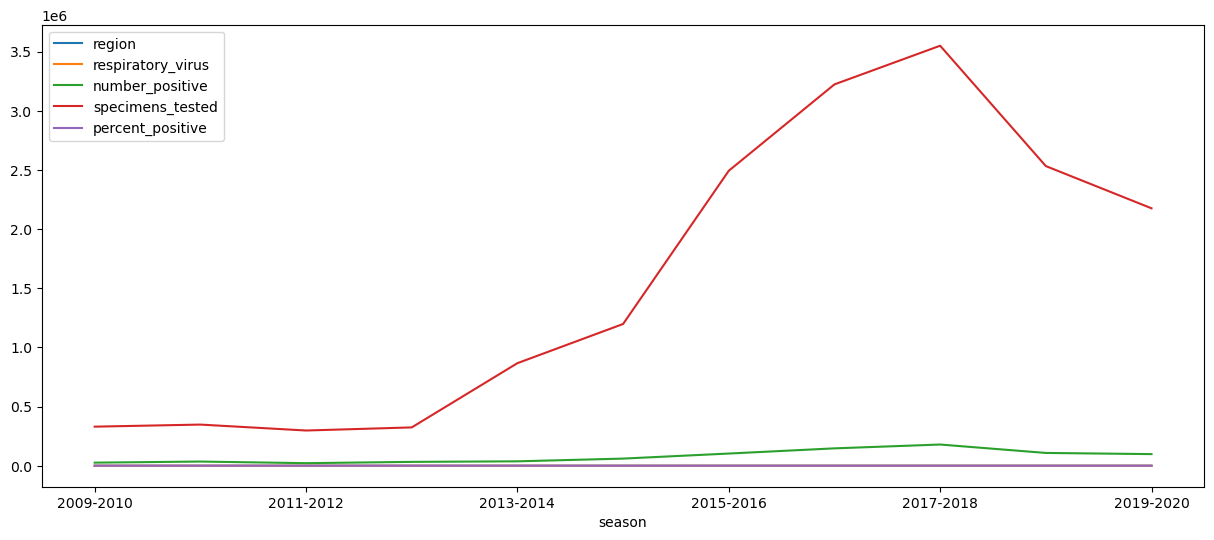

In [417]:
season_wise.plot(figsize=(15,6))

# Grouping Data values For Clinical Data for Each column by Date Code.

In [418]:
date_code_wise=clinical_combined_filtered.groupby(["date_code"]).agg({"region":pd.Series.nunique,"respiratory_virus":pd.Series.nunique,"number_positive":"sum","specimens_tested":"sum","percent_positive":"mean"})

print("Basic Information for Clinical Data for Each Date Code")
print("Total number of Regions affected",date_code_wise["region"].iloc[-1])
print("Total number of Respiratory virus Found",date_code_wise["respiratory_virus"].iloc[-1])
print("Total number of Positive Cases",date_code_wise["number_positive"].iloc[-1])
print("Total number of People Tested",date_code_wise["specimens_tested"].iloc[-1])
print("Mean Percentage Positive for each date_code ",date_code_wise["percent_positive"].iloc[-1])

Basic Information for Clinical Data for Each Date Code
Total number of Regions affected 7
Total number of Respiratory virus Found 16
Total number of Positive Cases 104
Total number of People Tested 13160
Mean Percentage Positive for each date_code  0.7012575621641709


<Axes: xlabel='date_code'>

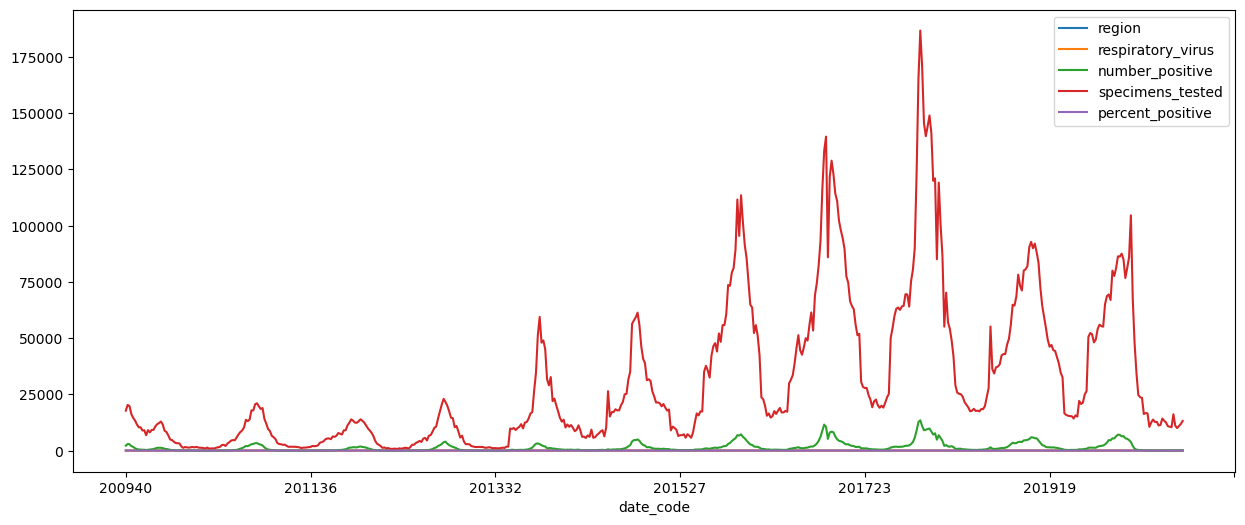

In [419]:
date_code_wise.plot(figsize=(15,6))

# Grouping Data values For Clinical Data for  each column by weekend date.

In [420]:
weekendwise_clinical=clinical_combined_filtered.groupby(["date_code"]).agg({"region":pd.Series.nunique,"respiratory_virus":pd.Series.nunique,"number_positive":"sum","specimens_tested":"sum","percent_positive":"mean"})

print("Basic Information for Clinical Data for Each Week")
print("Total number of Regions affected",weekendwise_clinical["region"].iloc[-1])
print("Total number of Respiratory virus Found",weekendwise_clinical["respiratory_virus"].iloc[-1])
print("Total number of Positive Cases",weekendwise_clinical["number_positive"].iloc[-1])
print("Total number of People Tested",weekendwise_clinical["specimens_tested"].iloc[-1])
print("Mean Percentage Positive for each week ",weekendwise_clinical["percent_positive"].iloc[-1])

Basic Information for Clinical Data for Each Week
Total number of Regions affected 7
Total number of Respiratory virus Found 16
Total number of Positive Cases 104
Total number of People Tested 13160
Mean Percentage Positive for each week  0.7012575621641709


<Axes: xlabel='date_code'>

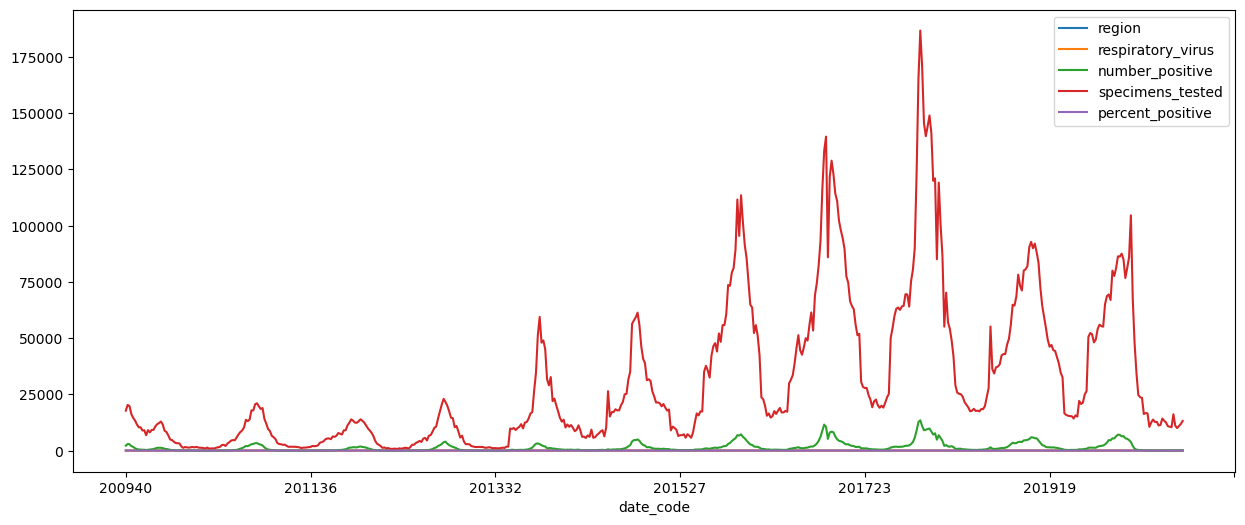

In [421]:
weekendwise_clinical.plot(figsize=(15,6))

In [422]:
weekendwise_clinical.shape

(573, 5)

In [423]:
weekendwise_clinical.to_csv('weekend_wise_Clinical_data.csv',index=False)

In [424]:
clinical_combined_filtered_new = clinical_combined_filtered[["weekending", "number_positive"]]


In [425]:
clinical_combined_filtered_new.head()

,weekending,number_positive
0,2009-10-10,36
1,2009-10-10,0
2,2009-10-10,0
3,2009-10-10,1077
4,2009-10-10,3


In [426]:
clinical_combined_filtered_new.shape

(44998, 2)

In [427]:
clinical_combined_filtered_new=clinical_combined_filtered_new.reset_index(drop=True)

In [428]:
clinical_combined_filtered_new.drop_duplicates(inplace=True)


In [429]:
clinical_combined_filtered_new.shape

(11533, 2)

In [430]:
clinical_combined_filtered_new=clinical_combined_filtered_new.reset_index(drop=True)

In [431]:
clinical_combined_filtered_new.tail()

,weekending,number_positive
11528,2018-09-22,59
11529,2018-09-22,209
11530,2018-09-29,71
11531,2018-09-29,350
11532,2018-09-29,32


In [432]:
week_wise_clinical=clinical_combined_filtered_new.groupby(["weekending"]).agg({"number_positive":"sum"})


In [433]:
week_wise_clinical.head()

,number_positive
weekending,
2009-10-10,2160
2009-10-17,2935
2009-10-24,2802
2009-10-31,1984
2009-11-07,1635


In [434]:
week_wise_clinical.head()

,number_positive
weekending,
2009-10-10,2160
2009-10-17,2935
2009-10-24,2802
2009-10-31,1984
2009-11-07,1635


<Axes: xlabel='weekending'>

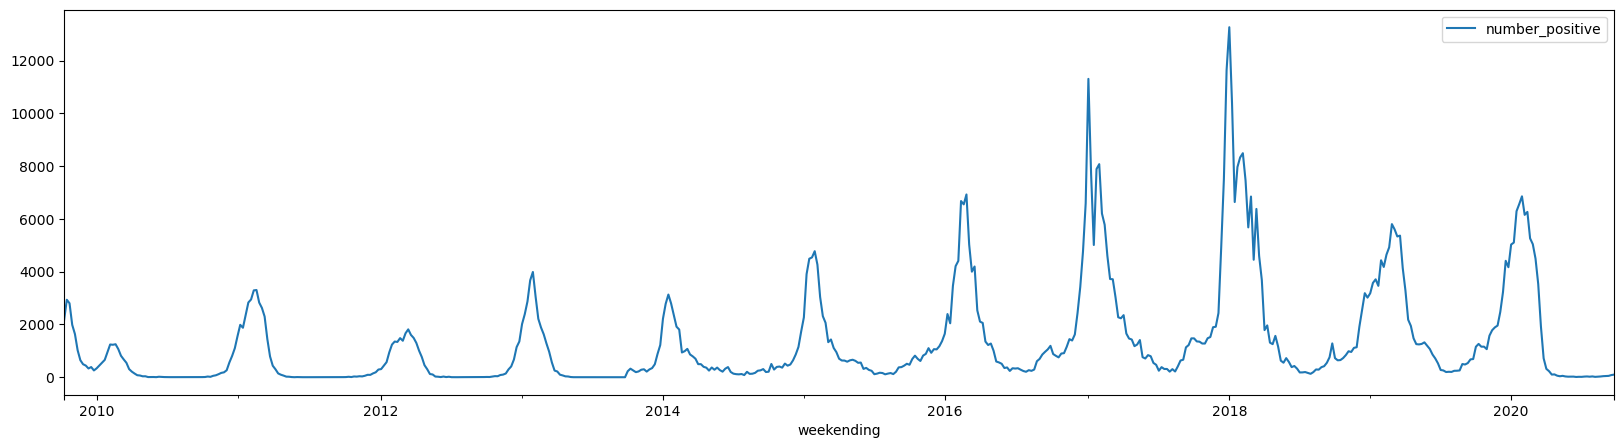

In [435]:
week_wise_clinical.plot(figsize=(20,5))

# Bar plot of the number of positive cases of influenza and other respiratory viruses by region.

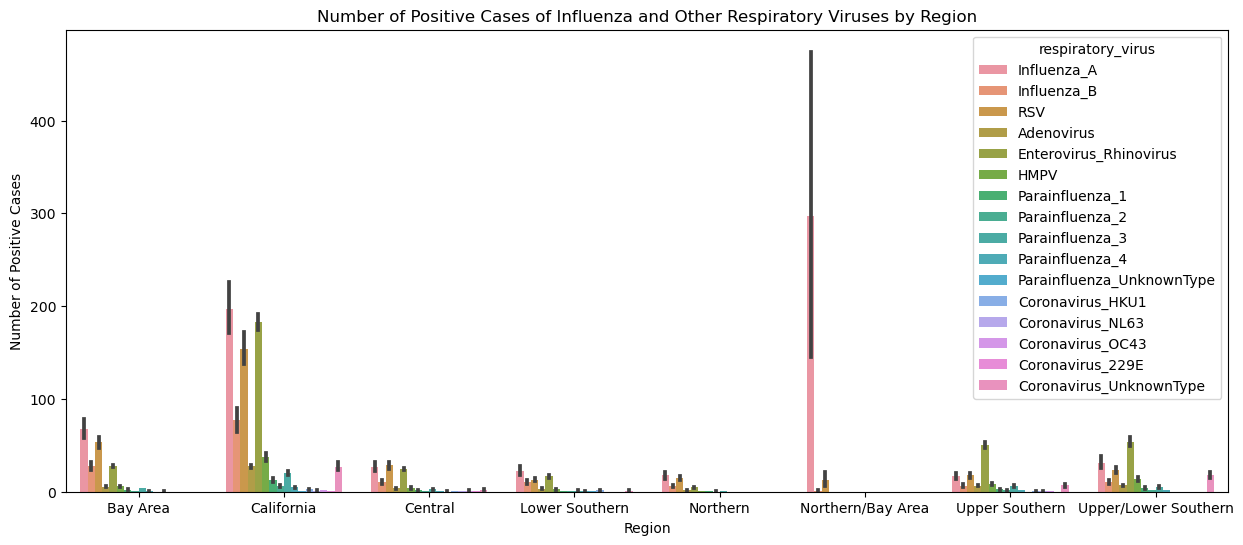

In [436]:
plt.figure(figsize=(15, 6))
sns.barplot(x='region', y='number_positive', hue='respiratory_virus', data=clinical_combined_filtered)
plt.title('Number of Positive Cases of Influenza and Other Respiratory Viruses by Region')
plt.xlabel('Region')
plt.ylabel('Number of Positive Cases')
plt.show()


# Heatmap of the percentage of positive cases of influenza and other respiratory viruses by region and weekending date.

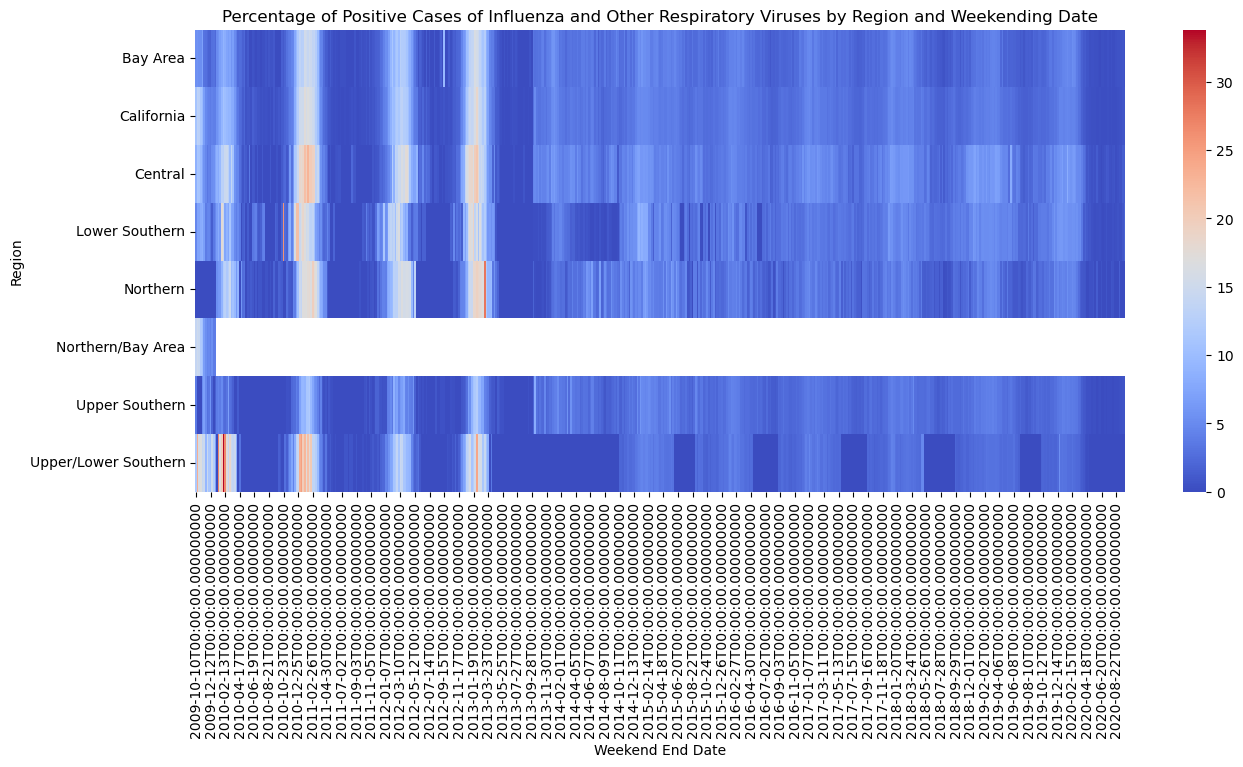

In [437]:
clinical_combined_filtered['weekending'] = pd.to_datetime(clinical_combined_filtered['weekending'])
heatmap_data = clinical_combined_filtered.pivot_table(values='percent_positive', index='region', columns='weekending')
plt.figure(figsize=(15, 6))
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Percentage of Positive Cases of Influenza and Other Respiratory Viruses by Region and Weekending Date')
plt.xlabel('Weekend End Date')
plt.ylabel('Region')
plt.show()

In [438]:
#Scatter plot of the number of positive cases of influenza and other respiratory viruses against the percentage of positive cases.

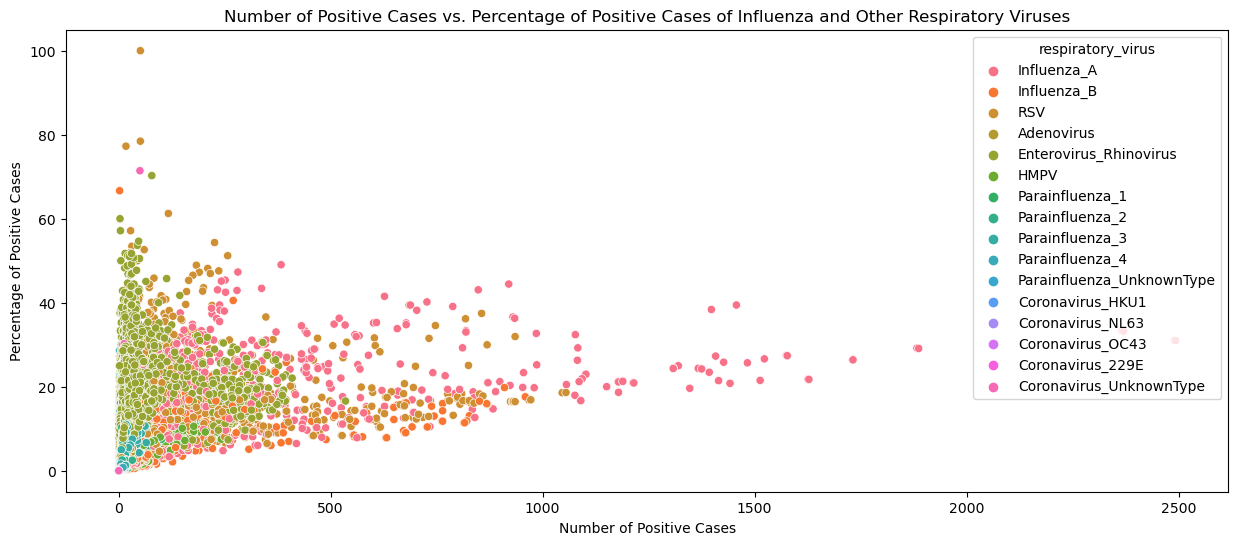

In [439]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='number_positive', y='percent_positive', hue='respiratory_virus', data=clinical_combined_filtered)
plt.title('Number of Positive Cases vs. Percentage of Positive Cases of Influenza and Other Respiratory Viruses')
plt.xlabel('Number of Positive Cases')
plt.ylabel('Percentage of Positive Cases')
plt.show()


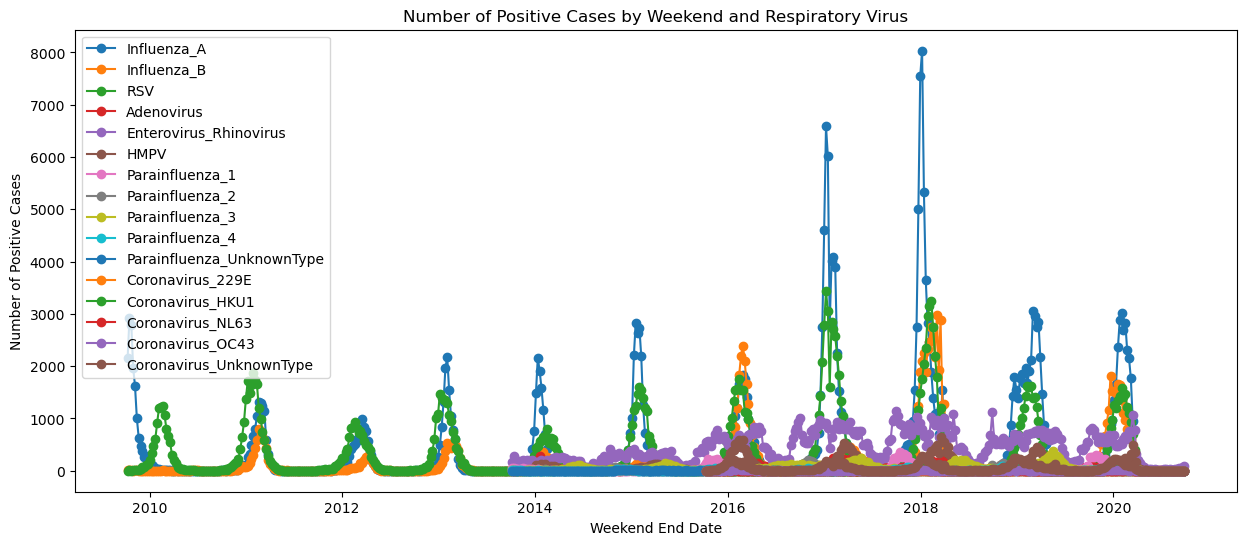

In [440]:
# group the data by weekending and respiratory_virus
week_wise = clinical_combined_filtered.groupby(['weekending', 'respiratory_virus']).sum().reset_index()

# create a line plot of number_positive vs weekending for each respiratory_virus
fig, ax = plt.subplots(figsize=(15, 6))
for virus in week_wise['respiratory_virus'].unique():
    ax.plot(week_wise[week_wise['respiratory_virus']==virus]['weekending'], 
            week_wise[week_wise['respiratory_virus']==virus]['number_positive'], 
            label=virus, marker='o')
    
# set axis labels and title
ax.set_xlabel('Weekend End Date')
ax.set_ylabel('Number of Positive Cases')
ax.set_title('Number of Positive Cases by Weekend and Respiratory Virus')

# set legend
ax.legend()

# show the plot
plt.show()

In [441]:
outpatient_data=pd.read_csv('outpatient_data.csv')

In [442]:
outpatient_data.head()

,season,date_code,weekending,region,total_ili,total_patients_seen,percent_ili,number_providers_reporting
0,2001-2002,200140,10/6/2001,Bay Area,3,135,2.22,2
1,2001-2002,200140,10/6/2001,California,25,1211,2.06,14
2,2001-2002,200140,10/6/2001,Central,0,0,NaN,0
3,2001-2002,200140,10/6/2001,Lower Southern,2,336,0.60,4
4,2001-2002,200140,10/6/2001,Northern,20,529,3.78,4


In [443]:
outpatient_data.tail()

,season,date_code,weekending,region,total_ili,total_patients_seen,percent_ili,number_providers_reporting
5941,2019-2020,202039,9/26/2020,California,448,50902,0.88,87
5942,2019-2020,202039,9/26/2020,Central,0,447,0.00,3
5943,2019-2020,202039,9/26/2020,Lower Southern,134,21280,0.63,36
5944,2019-2020,202039,9/26/2020,Northern,122,14125,0.86,17
5945,2019-2020,202039,9/26/2020,Upper Southern,2,1724,0.12,12


In [444]:
outpatient_data.shape

(5946, 8)

In [445]:
# Step 2: Check for missing values
missing_values = outpatient_data.isnull().sum()
print(missing_values)

season                         0
date_code                      0
weekending                     0
region                         0
total_ili                      0
total_patients_seen            0
percent_ili                   29
number_providers_reporting     0
dtype: int64


In [446]:
# extract rows where 'percent_ili' is null and show only 'total_patients_seen', 'total_ili', and 'percent_ili' columns
null_percent_ili = outpatient_data.loc[outpatient_data['percent_ili'].isnull(), ['total_patients_seen', 'total_ili', 'percent_ili']]

print(null_percent_ili)

     total_patients_seen  total_ili  percent_ili
2                      0          0          NaN
8                      0          0          NaN
14                     0          0          NaN
20                     0          0          NaN
26                     0          0          NaN
32                     0          0          NaN
230                    0          0          NaN
236                    0          0          NaN
242                    0          0          NaN
268                    0          0          NaN
274                    0          0          NaN
280                    0          0          NaN
286                    0          0          NaN
292                    0          0          NaN
298                    0          0          NaN
308                    0          0          NaN
314                    0          0          NaN
512                    0          0          NaN
536                    0          0          NaN
543                 

In [447]:
outpatient_data_copy_missing_correction=outpatient_data.copy()

In [448]:
outpatient_data_copy_missing_correction.shape

(5946, 8)

In [449]:
# Step 2: Check for missing values
missing_values = outpatient_data_copy_missing_correction.isnull().sum()
print(missing_values)

season                         0
date_code                      0
weekending                     0
region                         0
total_ili                      0
total_patients_seen            0
percent_ili                   29
number_providers_reporting     0
dtype: int64


In [450]:
# calculate percent_ili and insert zero if total_patients_seen and total_ili are zero
outpatient_data_copy_missing_correction['percent_ili'] = outpatient_data_copy_missing_correction['total_ili'] / outpatient_data_copy_missing_correction['total_patients_seen'] * 100
outpatient_data_copy_missing_correction.loc[(outpatient_data_copy_missing_correction['total_patients_seen'] == 0) & (outpatient_data_copy_missing_correction['total_ili'] == 0), 'percent_ili'] = 0

print(outpatient_data_copy_missing_correction)

         season  date_code weekending          region  total_ili  \
0     2001-2002     200140  10/6/2001        Bay Area          3   
1     2001-2002     200140  10/6/2001      California         25   
2     2001-2002     200140  10/6/2001         Central          0   
3     2001-2002     200140  10/6/2001  Lower Southern          2   
4     2001-2002     200140  10/6/2001        Northern         20   
...         ...        ...        ...             ...        ...   
5941  2019-2020     202039  9/26/2020      California        448   
5942  2019-2020     202039  9/26/2020         Central          0   
5943  2019-2020     202039  9/26/2020  Lower Southern        134   
5944  2019-2020     202039  9/26/2020        Northern        122   
5945  2019-2020     202039  9/26/2020  Upper Southern          2   

      total_patients_seen  percent_ili  number_providers_reporting  
0                     135     2.222222                           2  
1                    1211     2.064410       

In [451]:
# Step 2: Check for missing values
missing_values = outpatient_data_copy_missing_correction.isnull().sum()
print(missing_values)

season                        0
date_code                     0
weekending                    0
region                        0
total_ili                     0
total_patients_seen           0
percent_ili                   0
number_providers_reporting    0
dtype: int64


In [452]:
outpatient_data_copy_missing_correction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5946 entries, 0 to 5945
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   season                      5946 non-null   object 
 1   date_code                   5946 non-null   int64  
 2   weekending                  5946 non-null   object 
 3   region                      5946 non-null   object 
 4   total_ili                   5946 non-null   int64  
 5   total_patients_seen         5946 non-null   int64  
 6   percent_ili                 5946 non-null   float64
 7   number_providers_reporting  5946 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 371.8+ KB


In [453]:
outpatient_data_copy_missing_correction['date_code'] = outpatient_data_copy_missing_correction['date_code'].astype(str)
outpatient_data_copy_missing_correction['weekending']=pd.to_datetime(outpatient_data_copy_missing_correction['weekending'])

In [454]:
outpatient_data_copy_missing_correction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5946 entries, 0 to 5945
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   season                      5946 non-null   object        
 1   date_code                   5946 non-null   object        
 2   weekending                  5946 non-null   datetime64[ns]
 3   region                      5946 non-null   object        
 4   total_ili                   5946 non-null   int64         
 5   total_patients_seen         5946 non-null   int64         
 6   percent_ili                 5946 non-null   float64       
 7   number_providers_reporting  5946 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 371.8+ KB


In [455]:
outpatient_data_copy_missing_correction.shape

(5946, 8)

In [456]:
surveillance_outpatient_data=pd.read_csv('surveillance_outpatient_data.csv')

In [457]:
surveillance_outpatient_data.shape

(5322, 8)

In [458]:
surveillance_outpatient_data.head()

,season,date_code,weekending,region,total_ili,total_patients_seen,percent_ili,number_providers_reporting
0,2001-2002,200140,10/6/2001,Bay Area,3,135,2.22,2
1,2001-2002,200140,10/6/2001,California,25,1211,2.06,14
2,2001-2002,200140,10/6/2001,Central,0,0,NaN,0
3,2001-2002,200140,10/6/2001,Lower Southern,2,336,0.60,4
4,2001-2002,200140,10/6/2001,Northern,20,529,3.78,4


In [459]:
surveillance_outpatient_data.tail()

,season,date_code,weekending,region,total_ili,total_patients_seen,percent_ili,number_providers_reporting
5317,2017-2018,201839,9/29/2018,California,530,39953,1.33,69
5318,2017-2018,201839,9/29/2018,Central,19,684,2.78,4
5319,2017-2018,201839,9/29/2018,Lower Southern,179,17299,1.03,32
5320,2017-2018,201839,9/29/2018,Northern,20,2547,0.79,6
5321,2017-2018,201839,9/29/2018,Upper Southern,5,2503,0.20,8


In [460]:
# Step 2: Check for missing values
missing_values = surveillance_outpatient_data.isnull().sum()
print(missing_values)

season                         0
date_code                      0
weekending                     0
region                         0
total_ili                      0
total_patients_seen            0
percent_ili                   29
number_providers_reporting     0
dtype: int64


In [461]:
# extract rows where 'percent_ili' is null and show only 'total_patients_seen', 'total_ili', and 'percent_ili' columns
null_percent_ili = outpatient_data.loc[outpatient_data['percent_ili'].isnull(), ['total_patients_seen', 'total_ili', 'percent_ili']]

print(null_percent_ili)

     total_patients_seen  total_ili  percent_ili
2                      0          0          NaN
8                      0          0          NaN
14                     0          0          NaN
20                     0          0          NaN
26                     0          0          NaN
32                     0          0          NaN
230                    0          0          NaN
236                    0          0          NaN
242                    0          0          NaN
268                    0          0          NaN
274                    0          0          NaN
280                    0          0          NaN
286                    0          0          NaN
292                    0          0          NaN
298                    0          0          NaN
308                    0          0          NaN
314                    0          0          NaN
512                    0          0          NaN
536                    0          0          NaN
543                 

In [462]:
surveillance_outpatient_data_copy_missing_correction=surveillance_outpatient_data.copy()

In [463]:
surveillance_outpatient_data_copy_missing_correction.shape

(5322, 8)

In [464]:
# Step 2: Check for missing values
missing_values = surveillance_outpatient_data_copy_missing_correction.isnull().sum()
print(missing_values)

season                         0
date_code                      0
weekending                     0
region                         0
total_ili                      0
total_patients_seen            0
percent_ili                   29
number_providers_reporting     0
dtype: int64


In [465]:
# calculate percent_ili and insert zero if total_patients_seen and total_ili are zero
surveillance_outpatient_data_copy_missing_correction['percent_ili'] = surveillance_outpatient_data_copy_missing_correction['total_ili'] / surveillance_outpatient_data_copy_missing_correction['total_patients_seen'] * 100
surveillance_outpatient_data_copy_missing_correction.loc[(surveillance_outpatient_data_copy_missing_correction['total_patients_seen'] == 0) & (surveillance_outpatient_data_copy_missing_correction['total_ili'] == 0), 'percent_ili'] = 0

print(surveillance_outpatient_data_copy_missing_correction)

         season  date_code weekending          region  total_ili  \
0     2001-2002     200140  10/6/2001        Bay Area          3   
1     2001-2002     200140  10/6/2001      California         25   
2     2001-2002     200140  10/6/2001         Central          0   
3     2001-2002     200140  10/6/2001  Lower Southern          2   
4     2001-2002     200140  10/6/2001        Northern         20   
...         ...        ...        ...             ...        ...   
5317  2017-2018     201839  9/29/2018      California        530   
5318  2017-2018     201839  9/29/2018         Central         19   
5319  2017-2018     201839  9/29/2018  Lower Southern        179   
5320  2017-2018     201839  9/29/2018        Northern         20   
5321  2017-2018     201839  9/29/2018  Upper Southern          5   

      total_patients_seen  percent_ili  number_providers_reporting  
0                     135     2.222222                           2  
1                    1211     2.064410       

In [466]:
# Step 2: Check for missing values
missing_values = surveillance_outpatient_data_copy_missing_correction.isnull().sum()
print(missing_values)

season                        0
date_code                     0
weekending                    0
region                        0
total_ili                     0
total_patients_seen           0
percent_ili                   0
number_providers_reporting    0
dtype: int64


In [467]:
surveillance_outpatient_data_copy_missing_correction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   season                      5322 non-null   object 
 1   date_code                   5322 non-null   int64  
 2   weekending                  5322 non-null   object 
 3   region                      5322 non-null   object 
 4   total_ili                   5322 non-null   int64  
 5   total_patients_seen         5322 non-null   int64  
 6   percent_ili                 5322 non-null   float64
 7   number_providers_reporting  5322 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 332.8+ KB


In [468]:
surveillance_outpatient_data_copy_missing_correction['date_code'] = surveillance_outpatient_data_copy_missing_correction['date_code'].astype(str)
surveillance_outpatient_data_copy_missing_correction['weekending']=pd.to_datetime(surveillance_outpatient_data_copy_missing_correction['weekending'])

In [469]:
surveillance_outpatient_data_copy_missing_correction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   season                      5322 non-null   object        
 1   date_code                   5322 non-null   object        
 2   weekending                  5322 non-null   datetime64[ns]
 3   region                      5322 non-null   object        
 4   total_ili                   5322 non-null   int64         
 5   total_patients_seen         5322 non-null   int64         
 6   percent_ili                 5322 non-null   float64       
 7   number_providers_reporting  5322 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 332.8+ KB


In [470]:
surveillance_outpatient_data_copy_missing_correction.shape

(5322, 8)

In [471]:
if outpatient_data_copy_missing_correction.columns.equals(surveillance_outpatient_data_copy_missing_correction.columns):
    print("The columns of the two dataframes are equal")
else:
    print("The columns of the two dataframes are not equal")

The columns of the two dataframes are equal


In [472]:
outpatient_combined=pd.concat([outpatient_data_copy_missing_correction,surveillance_outpatient_data_copy_missing_correction])

In [473]:
outpatient_combined.shape

(11268, 8)

In [474]:
outpatient_combined.head()

,season,date_code,weekending,region,total_ili,total_patients_seen,percent_ili,number_providers_reporting
0,2001-2002,200140,2001-10-06,Bay Area,3,135,2.222222,2
1,2001-2002,200140,2001-10-06,California,25,1211,2.064410,14
2,2001-2002,200140,2001-10-06,Central,0,0,0.000000,0
3,2001-2002,200140,2001-10-06,Lower Southern,2,336,0.595238,4
4,2001-2002,200140,2001-10-06,Northern,20,529,3.780718,4


In [475]:
outpatient_combined.tail()

,season,date_code,weekending,region,total_ili,total_patients_seen,percent_ili,number_providers_reporting
5317,2017-2018,201839,2018-09-29,California,530,39953,1.326559,69
5318,2017-2018,201839,2018-09-29,Central,19,684,2.777778,4
5319,2017-2018,201839,2018-09-29,Lower Southern,179,17299,1.034742,32
5320,2017-2018,201839,2018-09-29,Northern,20,2547,0.785238,6
5321,2017-2018,201839,2018-09-29,Upper Southern,5,2503,0.199760,8


In [476]:
outpatient_combined=outpatient_combined.reset_index(drop=True)

In [477]:
outpatient_combined.head()

,season,date_code,weekending,region,total_ili,total_patients_seen,percent_ili,number_providers_reporting
0,2001-2002,200140,2001-10-06,Bay Area,3,135,2.222222,2
1,2001-2002,200140,2001-10-06,California,25,1211,2.064410,14
2,2001-2002,200140,2001-10-06,Central,0,0,0.000000,0
3,2001-2002,200140,2001-10-06,Lower Southern,2,336,0.595238,4
4,2001-2002,200140,2001-10-06,Northern,20,529,3.780718,4


In [478]:
outpatient_combined.tail()

,season,date_code,weekending,region,total_ili,total_patients_seen,percent_ili,number_providers_reporting
11263,2017-2018,201839,2018-09-29,California,530,39953,1.326559,69
11264,2017-2018,201839,2018-09-29,Central,19,684,2.777778,4
11265,2017-2018,201839,2018-09-29,Lower Southern,179,17299,1.034742,32
11266,2017-2018,201839,2018-09-29,Northern,20,2547,0.785238,6
11267,2017-2018,201839,2018-09-29,Upper Southern,5,2503,0.199760,8


In [479]:
outpatient_combined=outpatient_combined.reset_index(drop=True)

In [480]:
# drop duplicate rows
outpatient_combined.drop_duplicates(inplace=True)

In [481]:
outpatient_combined.shape

(6466, 8)

In [482]:
outpatient_combined=outpatient_combined.reset_index(drop=True)

In [483]:
outpatient_combined.shape

(6466, 8)

In [484]:
# check if the rows in the 'clinical_combined' DataFrame are unique
is_unique = outpatient_combined.duplicated(keep=False)

# print the duplicated rows
print(outpatient_combined[is_unique])

Empty DataFrame
Columns: [season, date_code, weekending, region, total_ili, total_patients_seen, percent_ili, number_providers_reporting]
Index: []


In [485]:
outpatient_combined.shape

(6466, 8)

In [486]:
outpatient_combined.head()

,season,date_code,weekending,region,total_ili,total_patients_seen,percent_ili,number_providers_reporting
0,2001-2002,200140,2001-10-06,Bay Area,3,135,2.222222,2
1,2001-2002,200140,2001-10-06,California,25,1211,2.064410,14
2,2001-2002,200140,2001-10-06,Central,0,0,0.000000,0
3,2001-2002,200140,2001-10-06,Lower Southern,2,336,0.595238,4
4,2001-2002,200140,2001-10-06,Northern,20,529,3.780718,4


In [487]:
outpatient_combined.tail()

,season,date_code,weekending,region,total_ili,total_patients_seen,percent_ili,number_providers_reporting
6461,2017-2018,201839,2018-09-29,Bay Area,307,16920,1.814421,19
6462,2017-2018,201839,2018-09-29,California,530,39953,1.326559,69
6463,2017-2018,201839,2018-09-29,Central,19,684,2.777778,4
6464,2017-2018,201839,2018-09-29,Lower Southern,179,17299,1.034742,32
6465,2017-2018,201839,2018-09-29,Northern,20,2547,0.785238,6


In [488]:
# renaming the some column names of the Outpatient_combined dataframe 
outpatient_combined = outpatient_combined.rename(columns={'total_ili': 'Total_illness', 'total_patients_seen': 'Number_of_patients_Seen', 'percent_ili':'Percentage_illness','number_providers_reporting': 'People_Reported_number'})

# display the new column names
print(outpatient_combined.columns)

Index(['season', 'date_code', 'weekending', 'region', 'Total_illness',
       'Number_of_patients_Seen', 'Percentage_illness',
       'People_Reported_number'],
      dtype='object')


In [489]:
outpatient_combined.head()

,season,date_code,weekending,region,Total_illness,Number_of_patients_Seen,Percentage_illness,People_Reported_number
0,2001-2002,200140,2001-10-06,Bay Area,3,135,2.222222,2
1,2001-2002,200140,2001-10-06,California,25,1211,2.064410,14
2,2001-2002,200140,2001-10-06,Central,0,0,0.000000,0
3,2001-2002,200140,2001-10-06,Lower Southern,2,336,0.595238,4
4,2001-2002,200140,2001-10-06,Northern,20,529,3.780718,4


In [490]:
outpatient_combined.tail()

,season,date_code,weekending,region,Total_illness,Number_of_patients_Seen,Percentage_illness,People_Reported_number
6461,2017-2018,201839,2018-09-29,Bay Area,307,16920,1.814421,19
6462,2017-2018,201839,2018-09-29,California,530,39953,1.326559,69
6463,2017-2018,201839,2018-09-29,Central,19,684,2.777778,4
6464,2017-2018,201839,2018-09-29,Lower Southern,179,17299,1.034742,32
6465,2017-2018,201839,2018-09-29,Northern,20,2547,0.785238,6


In [491]:
outpatient_combined_groupby_week = outpatient_combined.drop(["season", "date_code"], axis=1).groupby("weekending").agg({
    "region":pd.Series.nunique, 
    "respiratory_virus":pd.Series.nunique, 
    "number_positive": "sum", 
    "specimens_tested": "sum", 
    "percent_positive": "mean"
}).reset_index()

KeyError: "Column(s) ['number_positive', 'percent_positive', 'respiratory_virus', 'specimens_tested'] do not exist"

# Check the Descriptive Statistics for Clinical data

In [492]:
agg_dict = {
    "Total_illness": ["sum", "mean", "count"],
    "Number_of_patients_Seen": ["sum", "mean", "count"],
    "Percentage_illness": [ "mean"],
    "People_Reported_number":["sum","mean","count"]
}

outpatient_combined.agg(agg_dict)

,Total_illness,Number_of_patients_Seen,Percentage_illness,People_Reported_number
sum,1.639589e+06,6.868428e+07,NaN,197977.000000
mean,2.535708e+02,1.062238e+04,2.191999,30.618157
count,6.466000e+03,6.466000e+03,NaN,6466.000000


In [493]:
outpatient_combined_new = outpatient_combined[["weekending", "Total_illness"]]


In [494]:
outpatient_combined_new.head()

,weekending,Total_illness
0,2001-10-06,3
1,2001-10-06,25
2,2001-10-06,0
3,2001-10-06,2
4,2001-10-06,20


In [495]:
outpatient_combined_new.tail()

,weekending,Total_illness
6461,2018-09-29,307
6462,2018-09-29,530
6463,2018-09-29,19
6464,2018-09-29,179
6465,2018-09-29,20


In [496]:
outpatient_combined_new.shape

(6466, 2)

In [497]:
outpatient_combined_new=outpatient_combined_new.reset_index(drop=True)

In [498]:
outpatient_combined_new.drop_duplicates(inplace=True)


In [499]:
outpatient_combined_new.shape

(6202, 2)

In [500]:
outpatient_combined_new=outpatient_combined_new.reset_index(drop=True)

In [501]:
outpatient_combined_new.tail()

,weekending,Total_illness
6197,2018-09-29,307
6198,2018-09-29,530
6199,2018-09-29,19
6200,2018-09-29,179
6201,2018-09-29,20


In [502]:
week_wise_outpatient=outpatient_combined_new.groupby(["weekending"]).agg({"Total_illness":"sum"})


<Axes: xlabel='weekending'>

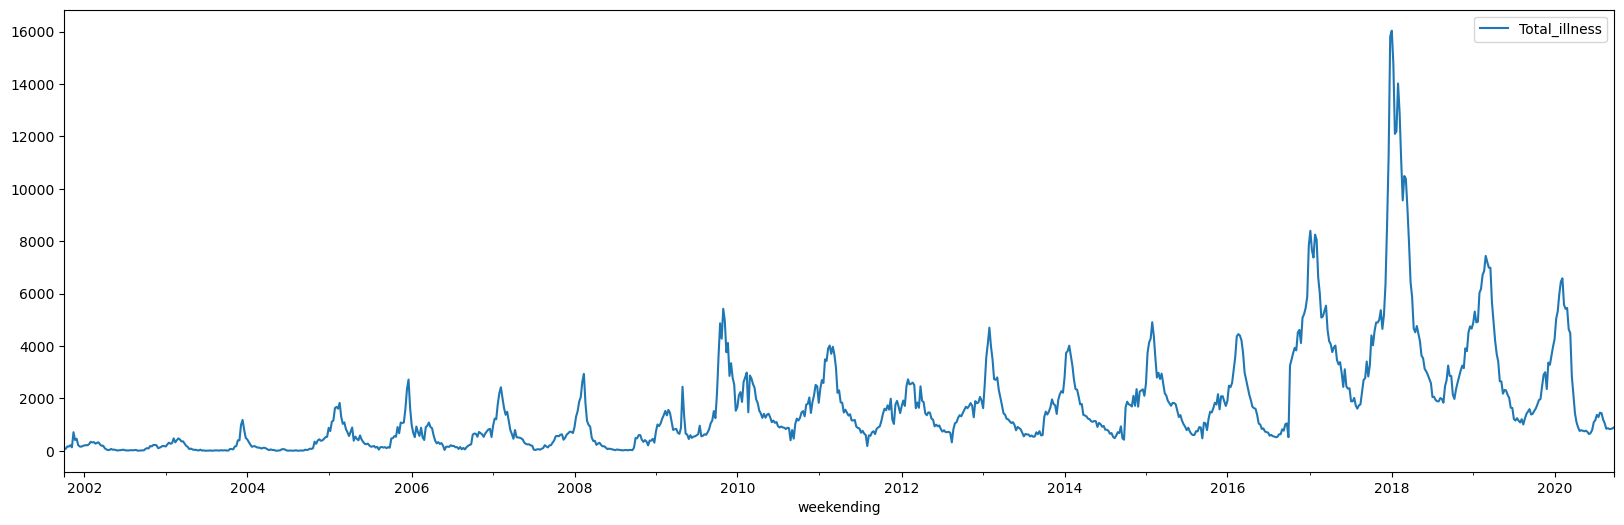

In [503]:
week_wise_outpatient.plot(figsize=(20,6))

# Grouping Data for Outpatient for Each column for Each Season.

In [504]:
season_wise=outpatient_combined.groupby(["season"]).agg({"region":pd.Series.nunique,"Total_illness":"sum","Number_of_patients_Seen":"sum","Percentage_illness":"mean","People_Reported_number":"sum"})

print("Basic Information for Outpatient Data By Season")
print("Total Number of Regions affected per season",season_wise["region"].iloc[-1])
print("Total Number of People found sicked per season",season_wise["Total_illness"].iloc[-1])
print("Total number  of Patients_Seen per season",season_wise["Number_of_patients_Seen"].iloc[-1])
print("Mean Percentage_illness per season",season_wise["Percentage_illness"].iloc[-1])
print("Total number of People Reported per season",season_wise["People_Reported_number"].iloc[-1])


Basic Information for Outpatient Data By Season
Total Number of Regions affected per season 6
Total Number of People found sicked per season 123132
Total number  of Patients_Seen per season 4993224
Mean Percentage_illness per season 1.9618289913489504
Total number of People Reported per season 10876


<Axes: xlabel='season'>

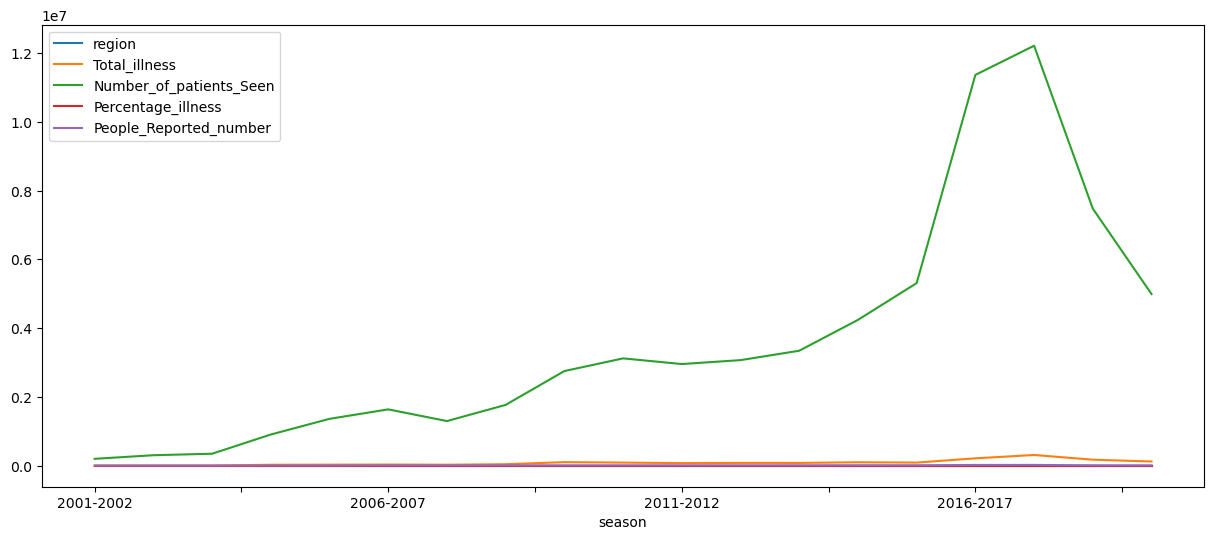

In [505]:
season_wise.plot(figsize=(15,6))

# Grouping Data for outpatient for each column by date code.

In [506]:
date_code=outpatient_combined.groupby(["date_code"]).agg({"region":pd.Series.nunique,"Total_illness":"sum","Number_of_patients_Seen":"sum","Percentage_illness":"mean","People_Reported_number":"sum"})

print("Basic Information")
print("Total Number of Regions affected",date_code["region"].iloc[-1])
print("Total Number of People found sicked",date_code["Total_illness"].iloc[-1])
print("Total number  of Patients_Seen",date_code["Number_of_patients_Seen"].iloc[-1])
print("Mean Percentage_illness",date_code["Percentage_illness"].iloc[-1])
print("Total number of People Reported ",date_code["People_Reported_number"].iloc[-1])



Basic Information
Total Number of Regions affected 6
Total Number of People found sicked 896
Total number  of Patients_Seen 101804
Mean Percentage_illness 0.6525553521375277
Total number of People Reported  174


<Axes: xlabel='date_code'>

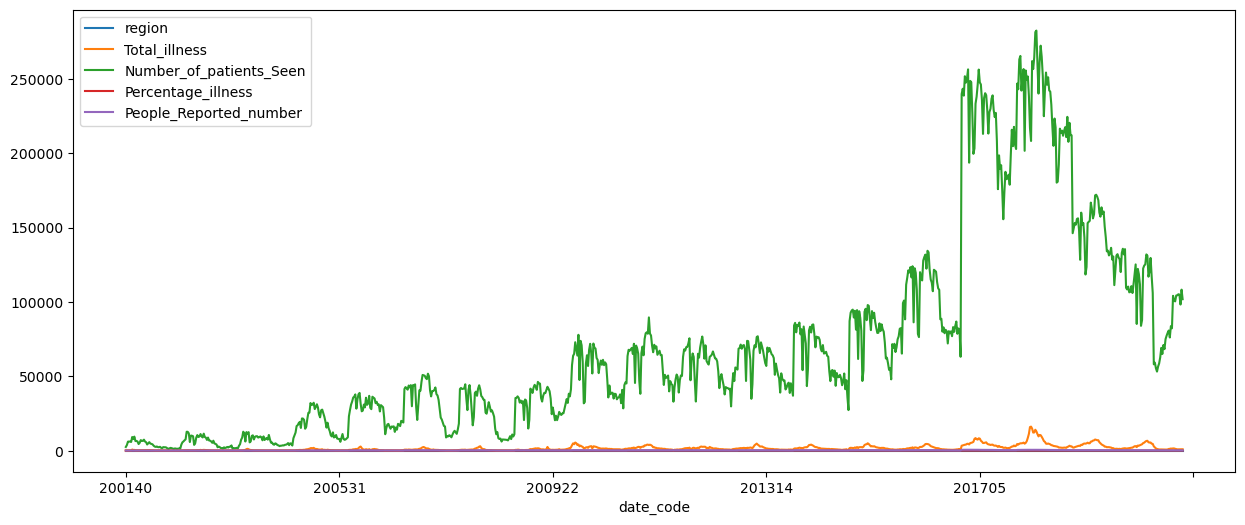

In [507]:
date_code.plot(figsize=(15,6))

# Grouping Data for Outpatient by Weekend date for each column.

In [508]:
weekendwise_outpatient=outpatient_combined.groupby(["weekending"]).agg({"region":pd.Series.nunique,"Total_illness":"sum","Number_of_patients_Seen":"sum","Percentage_illness":"mean","People_Reported_number":"sum"})

print("Basic Information")
print("Total Number of Regions affected",weekendwise_outpatient["region"].iloc[-1])
print("Total Number of People found sicked",weekendwise_outpatient["Total_illness"].iloc[-1])
print("Total number  of Patients_Seen",weekendwise_outpatient["Number_of_patients_Seen"].iloc[-1])
print("Mean Percentage_illness",weekendwise_outpatient["Percentage_illness"].iloc[-1])
print("Total number of People Reported ",weekendwise_outpatient["People_Reported_number"].iloc[-1])

Basic Information
Total Number of Regions affected 6
Total Number of People found sicked 896
Total number  of Patients_Seen 101804
Mean Percentage_illness 0.6525553521375277
Total number of People Reported  174


<Axes: xlabel='weekending'>

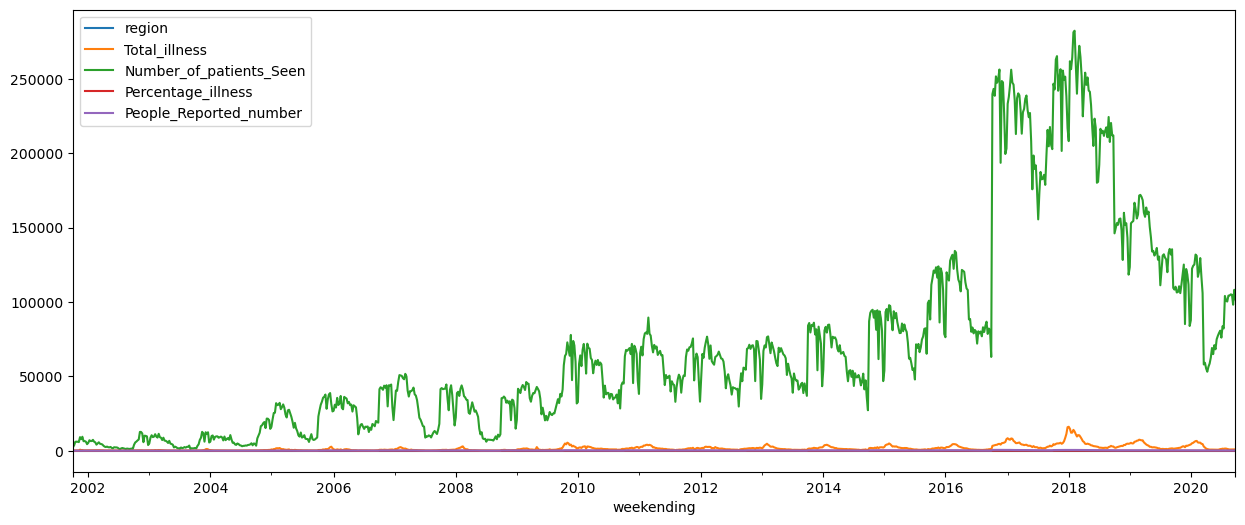

In [509]:
weekendwise_outpatient.plot(figsize=(15,6))

In [510]:
# convert the weekending column to datetime format
outpatient_combined['weekending'] = pd.to_datetime(outpatient_combined['weekending'])

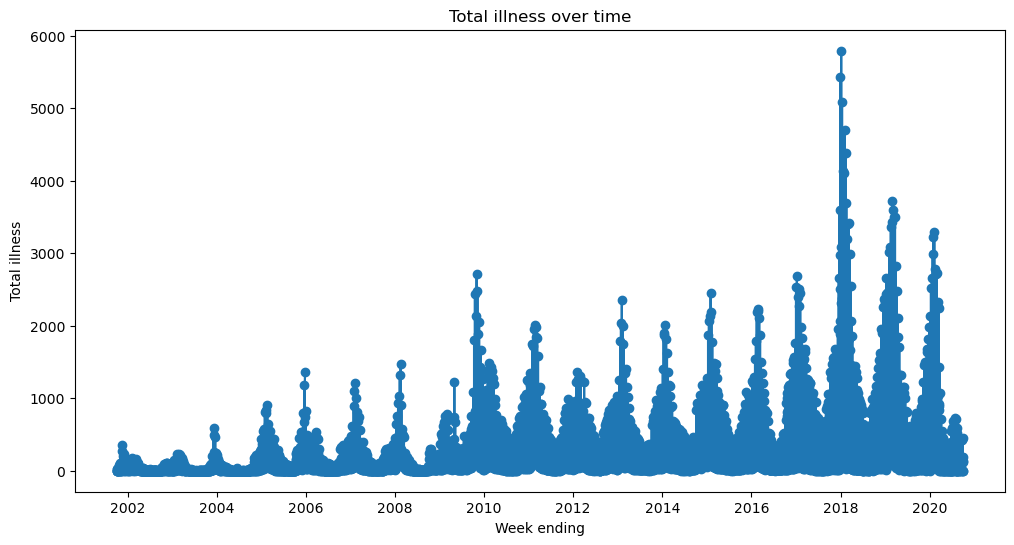

In [511]:
# create a line plot of total illness over time
plt.figure(figsize=(12,6))
plt.plot(outpatient_combined['weekending'], outpatient_combined['Total_illness'], marker='o')
plt.title('Total illness over time')
plt.xlabel('Week ending')
plt.ylabel('Total illness')
plt.show()

# Bar plot of number of patients seen by region: This plot can identify any significant increase or decrease in the number of patients seen by region.

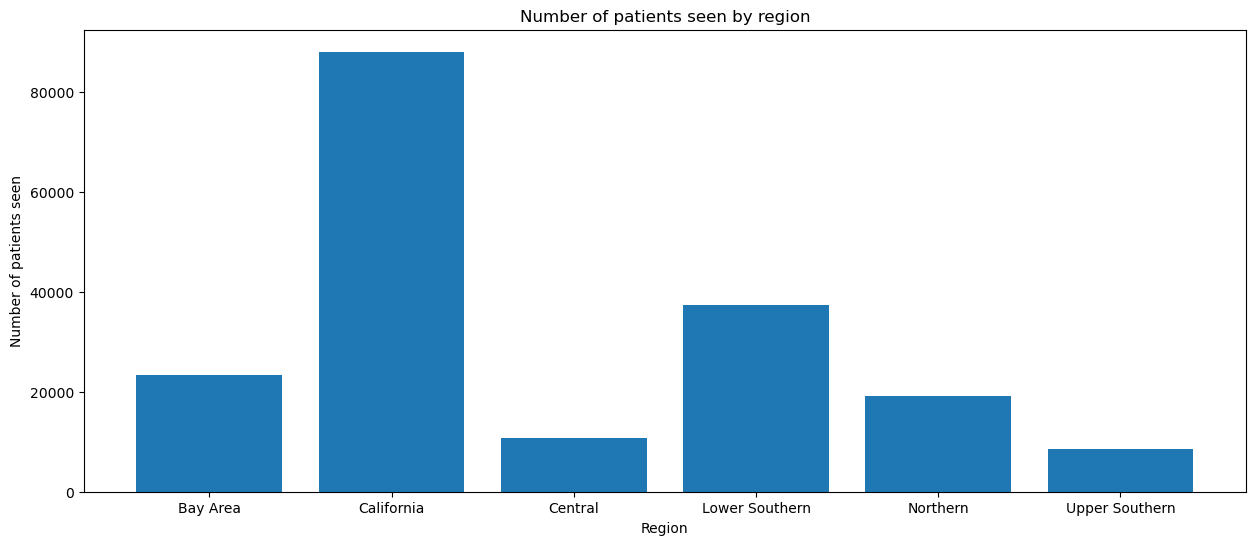

In [512]:
# create a bar plot of number of patients seen by region
plt.figure(figsize=(15,6))
plt.bar(outpatient_combined['region'], outpatient_combined['Number_of_patients_Seen'])
plt.title('Number of patients seen by region')
plt.xlabel('Region')
plt.ylabel('Number of patients seen')
plt.show()


# Line plot of percentage illness over time: This plot can show the trend of percentage illness over time and identify any significant increase or decrease in the percentage of illnesses.

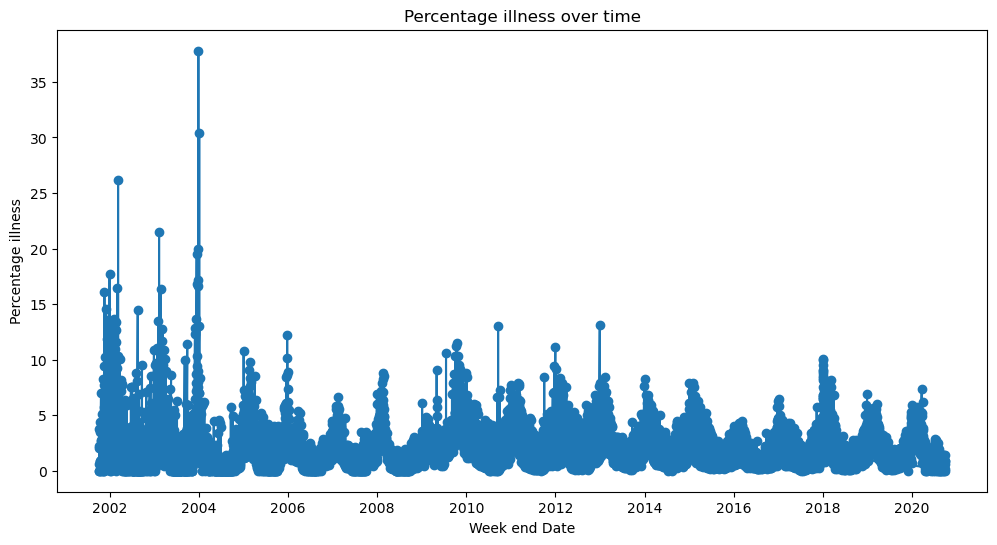

In [513]:
# create a line plot of percentage illness over time
plt.figure(figsize=(12,6))
plt.plot(outpatient_combined['weekending'], outpatient_combined['Percentage_illness'], marker='o')
plt.title('Percentage illness over time')
plt.xlabel('Week end Date')
plt.ylabel('Percentage illness')
plt.show()

# Line plot of people reported number over time: This plot can show the trend of people reported number over time and identify any significant increase or decrease in the number of people reported.

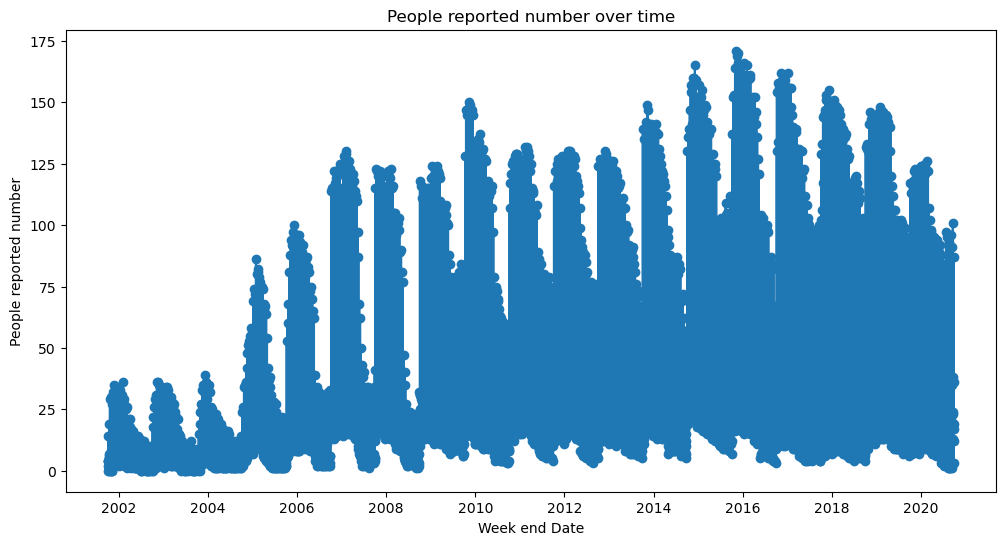

In [514]:
# create a line plot of people reported number over time
plt.figure(figsize=(12,6))
plt.plot(outpatient_combined['weekending'], outpatient_combined['People_Reported_number'], marker='o')
plt.title('People reported number over time')
plt.xlabel('Week end Date')
plt.ylabel('People reported number')
plt.show()

In [515]:
public_data=pd.read_csv('public_data.csv')

In [516]:
public_data.shape

(30072, 6)

In [517]:
public_data.head()

,season,date_code,weekending,region,influenza_category,count
0,2009-2010,200940,10/4/2009,Bay Area,Influenza_A,56
1,2009-2010,200940,10/4/2009,Bay Area,Influenza_AH3,0
2,2009-2010,200940,10/4/2009,Bay Area,Influenza_AH1,0
3,2009-2010,200940,10/4/2009,Bay Area,Influenza_AH1pdm09,0
4,2009-2010,200940,10/4/2009,Bay Area,Influenza_ANotSubtyped,56


In [518]:
public_data.tail()

,season,date_code,weekending,region,influenza_category,count
30067,2019-2020,202040,9/27/2020,Upper Southern,Influenza_BVictoria,0
30068,2019-2020,202040,9/27/2020,Upper Southern,Influenza_BYamagata,0
30069,2019-2020,202040,9/27/2020,Upper Southern,Influenza_BNotLineageTyped,0
30070,2019-2020,202040,9/27/2020,Upper Southern,Influenza_Total,0
30071,2019-2020,202040,9/27/2020,Upper Southern,Influenza_Tested,0


In [519]:
# Step 2: Check for missing values
missing_values = public_data.isnull().sum()
print(missing_values)

season                0
date_code             0
weekending            0
region                0
influenza_category    0
count                 0
dtype: int64


In [520]:
public_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30072 entries, 0 to 30071
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   season              30072 non-null  object
 1   date_code           30072 non-null  int64 
 2   weekending          30072 non-null  object
 3   region              30072 non-null  object
 4   influenza_category  30072 non-null  object
 5   count               30072 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.4+ MB


In [521]:
public_data['date_code'] = public_data['date_code'].astype(str)
public_data['weekending']=pd.to_datetime(public_data['weekending'])

In [522]:
public_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30072 entries, 0 to 30071
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   season              30072 non-null  object        
 1   date_code           30072 non-null  object        
 2   weekending          30072 non-null  datetime64[ns]
 3   region              30072 non-null  object        
 4   influenza_category  30072 non-null  object        
 5   count               30072 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ MB


In [523]:
surveillance_public_data=pd.read_csv('surveillance_public_data.csv')

In [524]:
surveillance_public_data.shape

(30072, 6)

In [525]:
surveillance_public_data.head()

,season,date_code,weekending,region,influenza_category,count
0,2009-2010,200940,10/4/2009,Bay Area,Influenza_A,56
1,2009-2010,200940,10/4/2009,Bay Area,Influenza_AH3,0
2,2009-2010,200940,10/4/2009,Bay Area,Influenza_AH1,0
3,2009-2010,200940,10/4/2009,Bay Area,Influenza_AH1pdm09,0
4,2009-2010,200940,10/4/2009,Bay Area,Influenza_ANotSubtyped,56


In [526]:
surveillance_public_data.tail()

,season,date_code,weekending,region,influenza_category,count
30067,2019-2020,202040,9/27/2020,Upper Southern,Influenza_BVictoria,0
30068,2019-2020,202040,9/27/2020,Upper Southern,Influenza_BYamagata,0
30069,2019-2020,202040,9/27/2020,Upper Southern,Influenza_BNotLineageTyped,0
30070,2019-2020,202040,9/27/2020,Upper Southern,Influenza_Total,0
30071,2019-2020,202040,9/27/2020,Upper Southern,Influenza_Tested,0


In [527]:
surveillance_public_data['date_code'] = surveillance_public_data['date_code'].astype(str)
surveillance_public_data['weekending']=pd.to_datetime(surveillance_public_data['weekending'])

In [528]:
# Step 2: Check for missing values
missing_values = surveillance_public_data.isnull().sum()
print(missing_values)

season                0
date_code             0
weekending            0
region                0
influenza_category    0
count                 0
dtype: int64


In [529]:
surveillance_public_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30072 entries, 0 to 30071
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   season              30072 non-null  object        
 1   date_code           30072 non-null  object        
 2   weekending          30072 non-null  datetime64[ns]
 3   region              30072 non-null  object        
 4   influenza_category  30072 non-null  object        
 5   count               30072 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ MB


In [530]:
if public_data.columns.equals(surveillance_public_data.columns):
    print("The columns of the two dataframes are equal")
else:
    print("The columns of the two dataframes are not equal")

The columns of the two dataframes are equal


In [531]:
public_combined=pd.concat([public_data,surveillance_public_data])

In [532]:
public_combined.shape

(60144, 6)

In [533]:
public_combined=public_combined.reset_index(drop=True)

In [534]:
# drop duplicate rows
public_combined.drop_duplicates(inplace=True)

In [535]:
public_combined=public_combined.reset_index(drop=True)

In [536]:
public_combined.shape

(30072, 6)

In [537]:
# Step 2: Check for missing values
missing_values = public_combined.isnull().sum()
print(missing_values)

season                0
date_code             0
weekending            0
region                0
influenza_category    0
count                 0
dtype: int64


In [538]:
# check if the rows in the 'clinical_combined' DataFrame are unique
is_unique = public_combined.duplicated(keep=False)

# print the duplicated rows
print(public_combined[is_unique])

Empty DataFrame
Columns: [season, date_code, weekending, region, influenza_category, count]
Index: []


# check for unique values for Region column in Public_combined dataframe.

In [539]:
# renaming the some column names of the Outpatient_combined dataframe 
public_combined = public_combined.rename(columns={'count': 'Total_Number'})

# display the new column names
print(public_combined.columns)

Index(['season', 'date_code', 'weekending', 'region', 'influenza_category',
       'Total_Number'],
      dtype='object')


In [540]:
unique_values = public_combined['region'].unique()
print(unique_values)


['Bay Area' 'California' 'Central' 'Lower Southern' 'Northern'
 'Upper Southern']


In [541]:
unique_values = public_combined['influenza_category'].unique()
print(unique_values)


['Influenza_A' 'Influenza_AH3' 'Influenza_AH1' 'Influenza_AH1pdm09'
 'Influenza_ANotSubtyped' 'Influenza_B' 'Influenza_Total'
 'Influenza_Tested' 'Influenza_BVictoria' 'Influenza_BYamagata'
 'Influenza_BNotLineageTyped']


In [542]:
# create a list of values to filter out Influenza_Total in public_combined dataframe.
filter_list = ['Influenza_Total','Influenza_Tested']
# filter out the rows containing these values
public_combined_filtered = public_combined[~public_combined['influenza_category'].isin(filter_list)]
public_combined_total_influenza_per_region = public_combined[public_combined['influenza_category'].isin(filter_list)]

In [543]:
public_combined_filtered.head()

,season,date_code,weekending,region,influenza_category,Total_Number
0,2009-2010,200940,2009-10-04,Bay Area,Influenza_A,56
1,2009-2010,200940,2009-10-04,Bay Area,Influenza_AH3,0
2,2009-2010,200940,2009-10-04,Bay Area,Influenza_AH1,0
3,2009-2010,200940,2009-10-04,Bay Area,Influenza_AH1pdm09,0
4,2009-2010,200940,2009-10-04,Bay Area,Influenza_ANotSubtyped,56


In [544]:
public_combined_filtered.tail()

,season,date_code,weekending,region,influenza_category,Total_Number
30065,2019-2020,202040,2020-09-27,Upper Southern,Influenza_ANotSubtyped,0
30066,2019-2020,202040,2020-09-27,Upper Southern,Influenza_B,0
30067,2019-2020,202040,2020-09-27,Upper Southern,Influenza_BVictoria,0
30068,2019-2020,202040,2020-09-27,Upper Southern,Influenza_BYamagata,0
30069,2019-2020,202040,2020-09-27,Upper Southern,Influenza_BNotLineageTyped,0


In [545]:
public_combined_filtered=public_combined_filtered.reset_index(drop=True)

In [546]:
public_combined_filtered.shape

(23184, 6)

In [547]:
public_combined_filtered.dtypes

season                        object
date_code                     object
weekending            datetime64[ns]
region                        object
influenza_category            object
Total_Number                   int64
dtype: object

# Grouping Data for Public Data for Each column for each season.

In [548]:
season_wise=public_combined_filtered.groupby(["season"]).agg({"region":pd.Series.nunique,"influenza_category":pd.Series.nunique,"Total_Number":"sum"})

print("Basic Information")
print("Total Number of Regions affected per season",season_wise["region"].iloc[-1])
print(" Number of Influenza category per season",season_wise["influenza_category"].iloc[-1])
print("Total number of Influenza virus  per season",season_wise["Total_Number"].iloc[-1])


Basic Information
Total Number of Regions affected per season 6
 Number of Influenza category per season 8
Total number of Influenza virus  per season 22760


<Axes: xlabel='season'>

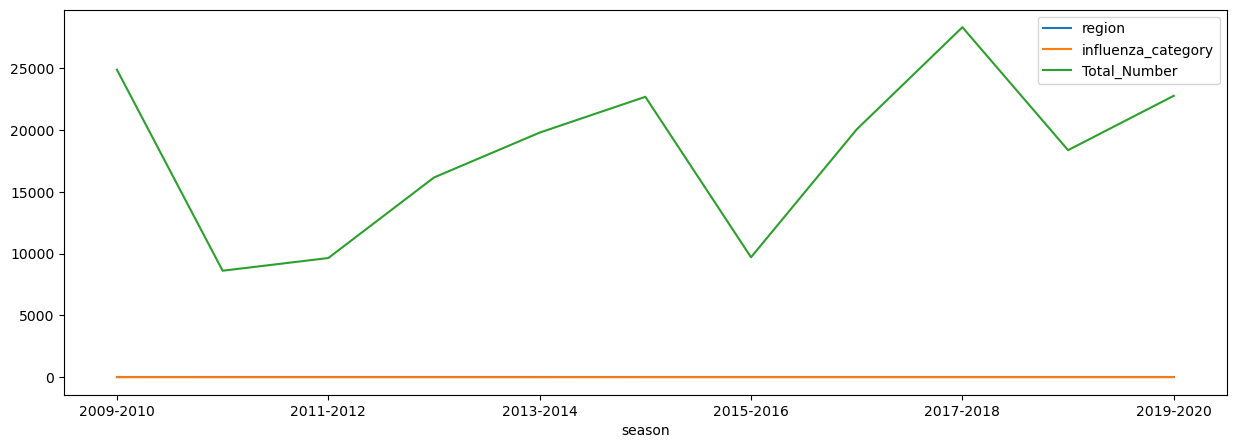

In [549]:
season_wise.plot(figsize=(15,5))

In [550]:
public_combined_filtered_new = public_combined_filtered[["weekending", "Total_Number"]]


In [551]:
public_combined_filtered_new.shape

(23184, 2)

In [552]:
public_combined_filtered_new=public_combined_filtered_new.reset_index(drop=True)

In [553]:
public_combined_filtered_new.drop_duplicates(inplace=True)


In [554]:
public_combined_filtered_new=public_combined_filtered_new.reset_index(drop=True)

In [555]:
public_combined_filtered_new.shape

(5120, 2)

In [556]:
public_combined_filtered_new.head()

,weekending,Total_Number
0,2009-10-04,56
1,2009-10-04,0
2,2009-10-04,614
3,2009-10-04,1
4,2009-10-04,192


In [557]:
public_combined_filtered_new.tail()

,weekending,Total_Number
5115,2020-08-30,0
5116,2020-09-06,0
5117,2020-09-13,0
5118,2020-09-20,0
5119,2020-09-27,0


In [558]:
public_combined_filtered_new=public_combined_filtered_new.reset_index(drop=True)

In [559]:
public_combined_filtered_new.head()

,weekending,Total_Number
0,2009-10-04,56
1,2009-10-04,0
2,2009-10-04,614
3,2009-10-04,1
4,2009-10-04,192


In [560]:
public_combined_filtered_new.tail()

,weekending,Total_Number
5115,2020-08-30,0
5116,2020-09-06,0
5117,2020-09-13,0
5118,2020-09-20,0
5119,2020-09-27,0


In [561]:
public_combined_filtered_new.shape

(5120, 2)

In [562]:
 week_wise_public=public_combined_filtered_new.groupby(["weekending"]).agg({"Total_Number":"sum"})


In [563]:
week_wise_public.shape

(574, 1)

In [564]:
week_wise_public.head()

,Total_Number
weekending,
2009-10-04,1229
2009-10-11,1680
2009-10-18,1753
2009-10-25,1740
2009-11-01,2715


<Axes: xlabel='weekending'>

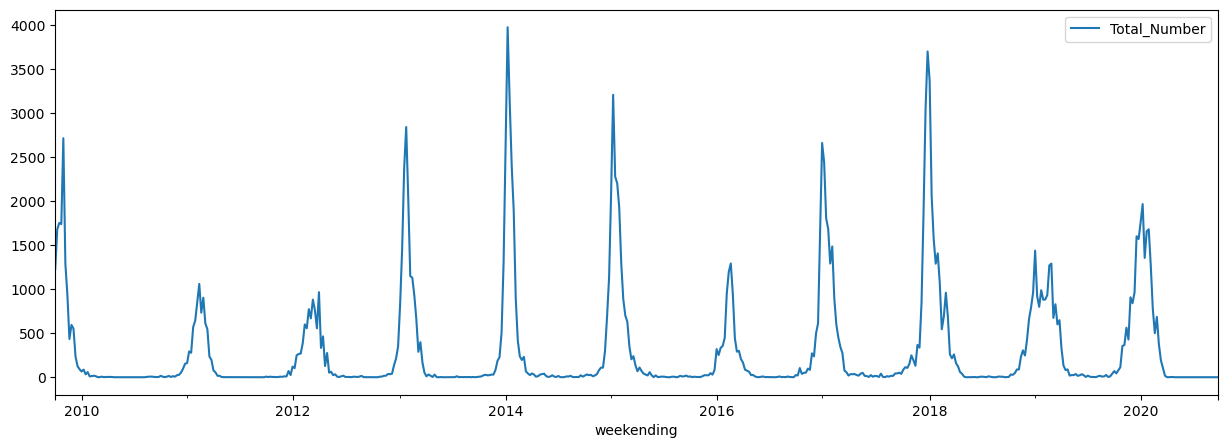

In [565]:
week_wise_public.plot(figsize=(15,5))

# Heatmap of total number of cases by region and influenza category: This can be done using a heatmap to visualize the distribution of total number of cases across different regions and influenza categories.

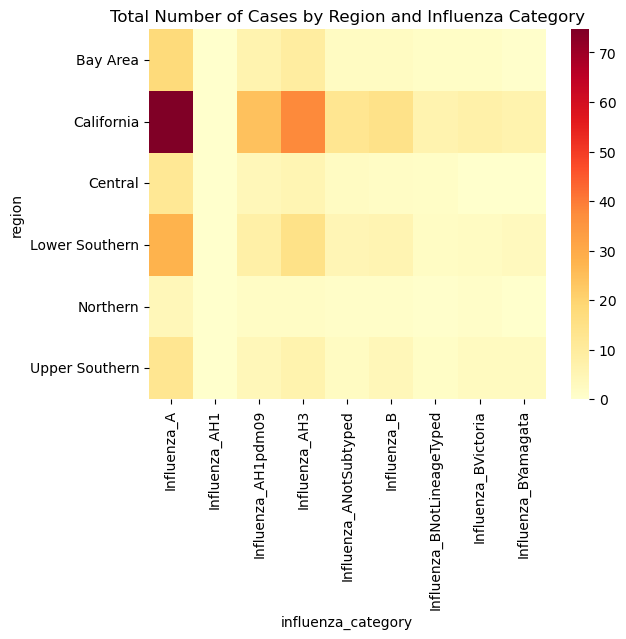

In [566]:
public_combined_filtered.set_index('region', inplace=True)
# pivot the data to create a heatmap
heatmap_data = public_combined_filtered.pivot_table(values='Total_Number', index='region', columns='influenza_category')

# plot the heatmap
sns.heatmap(heatmap_data, cmap='YlOrRd')
plt.title('Total Number of Cases by Region and Influenza Category')
plt.show()

In [567]:
week_wise_clinical.shape

(573, 1)

In [568]:
week_wise_outpatient.shape

(991, 1)

In [569]:
week_wise_public.shape


(574, 1)

In [570]:
# rename column 'Total_illness' to 'number_positive' for week_wise_outpatient data frame.
week_wise_outpatient = week_wise_outpatient.rename(columns={'Total_illness': 'number_positive'})

In [571]:
# rename column 'Total_Number' to 'number_positive' for week_wise_public data frame.
week_wise_public = week_wise_public.rename(columns={'Total_Number': 'number_positive'})

In [572]:
week_wise_clinical = week_wise_clinical.reset_index()


In [573]:
week_wise_outpatient = week_wise_outpatient.reset_index()


In [574]:
week_wise_public = week_wise_public.reset_index()


In [575]:
week_wise_clinical.columns

Index(['weekending', 'number_positive'], dtype='object')

In [576]:
week_wise_outpatient.columns

Index(['weekending', 'number_positive'], dtype='object')

In [577]:
week_wise_public.columns

Index(['weekending', 'number_positive'], dtype='object')

In [578]:
# outer join the three dataframes on the common columns "weekending" and "number_positive"
merged_df = week_wise_clinical.merge(week_wise_outpatient, on=['weekending', 'number_positive'], how='outer').merge(week_wise_public, on=['weekending', 'number_positive'], how='outer')

# fill null values with 0
merged_df = merged_df.fillna(0)

# delete duplicate rows
merged_df = merged_df.drop_duplicates()

# set "weekending" as index
merged_df = merged_df.set_index('weekending')

In [579]:
merged_df.head()

,number_positive
weekending,
2009-10-10,2160
2009-10-17,2935
2009-10-24,2802
2009-10-31,1984
2009-11-07,1635


In [580]:
# Add an index column
merged_df.reset_index(inplace=True)


In [581]:
# Create a Boolean mask to identify duplicated rows
duplicated_mask = merged_df.duplicated(subset='weekending', keep=False)

# Filter the DataFrame to show only the duplicated rows
duplicated_rows = merged_df[duplicated_mask]
print(duplicated_rows)

     weekending  number_positive
0    2009-10-10             2160
1    2009-10-17             2935
2    2009-10-24             2802
3    2009-10-31             1984
4    2009-11-07             1635
...         ...              ...
1559 2020-08-29              860
1560 2020-09-05              828
1561 2020-09-12              834
1562 2020-09-19              852
1563 2020-09-26              896

[1146 rows x 2 columns]


In [582]:
# Drop rows with duplicate timestamps
merged_df = merged_df.drop_duplicates(subset='weekending', keep='first')

In [583]:
merged_df.shape

(1565, 2)

In [584]:
merged_df.drop_duplicates(inplace=True)


In [585]:
merged_df.shape

(1565, 2)

In [586]:

# Write the dataframe to a CSV file
merged_df.to_csv('Clinical_Outpatient_Public_combined_Data.csv', index=False)
